# Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.


# Business Goal :

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.# 

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

# Reading the data from csv file

In [2]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#shape of the data frame
lead_df.shape

(9240, 37)

The data frame contains 9240 records and 37 columns

# Data Quality checks

#####  Using info() we will be able to get details such as name, number of non-null values and the data type of each and every column in the data frame.

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# describe() gives us the 5 point summary of the numerical data in the data frame
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Calculating total number of unique values in each and every column

In [6]:
for column in lead_df.columns:
    print(f"Unique Values in '{column}' are: {lead_df[column].nunique()}")

Unique Values in 'Prospect ID' are: 9240
Unique Values in 'Lead Number' are: 9240
Unique Values in 'Lead Origin' are: 5
Unique Values in 'Lead Source' are: 21
Unique Values in 'Do Not Email' are: 2
Unique Values in 'Do Not Call' are: 2
Unique Values in 'Converted' are: 2
Unique Values in 'TotalVisits' are: 41
Unique Values in 'Total Time Spent on Website' are: 1731
Unique Values in 'Page Views Per Visit' are: 114
Unique Values in 'Last Activity' are: 17
Unique Values in 'Country' are: 38
Unique Values in 'Specialization' are: 19
Unique Values in 'How did you hear about X Education' are: 10
Unique Values in 'What is your current occupation' are: 6
Unique Values in 'What matters most to you in choosing a course' are: 3
Unique Values in 'Search' are: 2
Unique Values in 'Magazine' are: 1
Unique Values in 'Newspaper Article' are: 2
Unique Values in 'X Education Forums' are: 2
Unique Values in 'Newspaper' are: 2
Unique Values in 'Digital Advertisement' are: 2
Unique Values in 'Through Recomm

In [7]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [8]:
lead_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

### Observations:
1. By looking at count of unique values of all the columns we came to know that both "Prospect ID" and "Lead Number" have same unique count 0 so we can drop "Lead Number"column as it does not play a much important role for analysis.
2. We have only one unique value in some of the column. These columns will not play an important role in the model building as the value is same across all the records. It is better to drop these columns.
3. Values in the columns "Last Notable Activity" and "Last Activity" are similar so we are dropping "Last Activity" column

In [9]:
lead_df.drop(columns=['Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Last Notable Activity'], axis=1,inplace=True)
lead_df.shape

(9240, 30)

##### Renaming some of the columns names for better readability and understanding

In [10]:
lead_df= lead_df.rename(columns={'Total Time Spent on Website':'website_timespent','How did you hear about X Education':'XEducation_hear','What matters most to you in choosing a course':'motto','What is your current occupation':'occupation', 'A free copy of Mastering The Interview':'freecopy'})
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,website_timespent,Page Views Per Visit,Last Activity,Country,Specialization,XEducation_hear,occupation,motto,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,freecopy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No


# Data cleaning

##### Here in the data frame some columns have the value as 'select' it is due to the individual did not choose any option. We need to replace this value with null

In [11]:
lead_df.replace('Select',np.nan,inplace= True)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,website_timespent,Page Views Per Visit,Last Activity,Country,Specialization,XEducation_hear,occupation,motto,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,freecopy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No


## Dealing with null values.

##### Checking the null percentage in the columns

In [12]:
round(lead_df.isnull().mean()*100,2)

Prospect ID                     0.00
Lead Origin                     0.00
Lead Source                     0.39
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     1.48
website_timespent               0.00
Page Views Per Visit            1.48
Last Activity                   1.11
Country                        26.63
Specialization                 36.58
XEducation_hear                78.46
occupation                     29.11
motto                          29.32
Search                          0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
Tags                           36.29
Lead Quality                   51.59
Lead Profile                   74.19
City                           39.71
Asymmetrique Activity Index    45.65
Asymmetrique Profile Index     45.65
A

### Observations:
1. The columns "XEducation_hear", "Lead Quality" and "Lead Profile" have null percent  which greater than 50 which is very high so we will drop these columns.
2. The missing value in the columns 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score' and'Asymmetrique Profile Score' are of type missing not ar random so we can not just drop these columns blindly.
3. We replace the null values with mode for the columns with type object other wise with median for numerical data types.

As we have less number of data available here we will just impute the null values instead of droping the records with null values.
 

In [13]:
lead_df.drop(["XEducation_hear","Lead Quality","Lead Profile"], axis=1,inplace=True)

In [14]:
#cross checking the shape of dataframe to see whether the columns are dropped or not
lead_df.shape

(9240, 27)

In [15]:
lead_df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [16]:
lead_df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

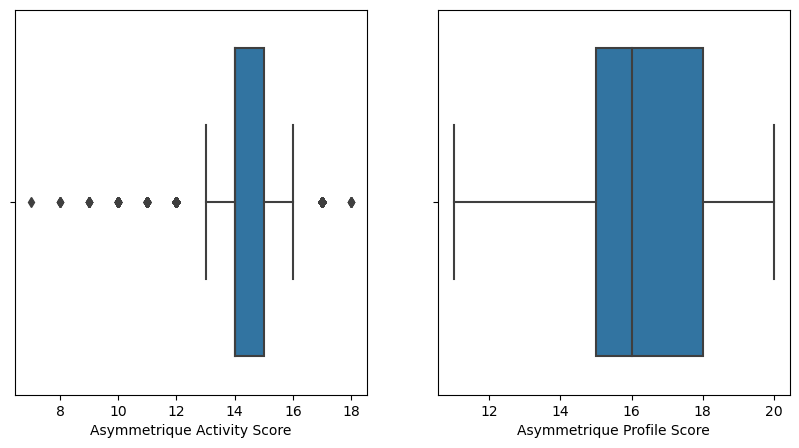

In [17]:
columns = ['Asymmetrique Activity Score', 'Asymmetrique Profile Score']

plt.figure(figsize=(10,5))
for i,column in enumerate(columns):
    plt.subplot(1,2,i+1)
    sns.boxplot(x = lead_df[column])
plt.show()

In [18]:
lead_df["Asymmetrique Activity Score"].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [19]:
lead_df["Asymmetrique Profile Score"].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

### Observations:
When we fill the columns "Asymmetrique Activity Score" and "Asymmetrique Profile Score"  with median, it would lead to lot of outliers and it is not recommendable. We can clearly see that the values in these two columns are finite and are repeated multiple number of times, so let's replace the null values with mode.

In [20]:
lead_df["Asymmetrique Activity Index"]= lead_df["Asymmetrique Activity Index"].fillna(lead_df["Asymmetrique Activity Index"].mode()[0])
lead_df["Asymmetrique Profile Index"]= lead_df["Asymmetrique Profile Index"].fillna(lead_df["Asymmetrique Profile Index"].mode()[0])
lead_df["Asymmetrique Activity Score"]= lead_df["Asymmetrique Activity Score"].fillna(lead_df["Asymmetrique Activity Score"].mode()[0])
lead_df["Asymmetrique Profile Score"]= lead_df["Asymmetrique Profile Score"].fillna(lead_df["Asymmetrique Profile Score"].mode()[0])

In [21]:
def imputenull(columns):
    for column in columns:
        if lead_df[column].dtype == "O":
            lead_df[column]= lead_df[column].fillna(lead_df[column].mode()[0])
        else:
            lead_df[column]= lead_df[column].fillna(lead_df[column].median())
            

## Imputing the null values 

In [22]:
imputenull(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'occupation', 'motto', 'Tags', 'City'])

## Final check of null values

In [23]:
# cross checking whether we imputed the null values or not
lead_df.isnull().mean()*100

Prospect ID                    0.0
Lead Origin                    0.0
Lead Source                    0.0
Do Not Email                   0.0
Do Not Call                    0.0
Converted                      0.0
TotalVisits                    0.0
website_timespent              0.0
Page Views Per Visit           0.0
Last Activity                  0.0
Country                        0.0
Specialization                 0.0
occupation                     0.0
motto                          0.0
Search                         0.0
Newspaper Article              0.0
X Education Forums             0.0
Newspaper                      0.0
Digital Advertisement          0.0
Through Recommendations        0.0
Tags                           0.0
City                           0.0
Asymmetrique Activity Index    0.0
Asymmetrique Profile Index     0.0
Asymmetrique Activity Score    0.0
Asymmetrique Profile Score     0.0
freecopy                       0.0
dtype: float64

## OutlierTreatment

In [24]:
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,website_timespent,Page Views Per Visit,Last Activity,Country,Specialization,occupation,motto,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,freecopy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Mumbai,02.Medium,02.Medium,15.0,15.0,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,02.Medium,02.Medium,15.0,15.0,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,14.0,20.0,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,02.Medium,01.High,13.0,17.0,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,15.0,18.0,No


In [25]:
catogerical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email','Do Not Call', 'Last Activity', 'Country', 'Specialization','occupation', 'motto', 'Search', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'City','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'freecopy']
numerical_columns = ['TotalVisits', 'website_timespent', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

In [26]:
lead_df.select_dtypes(include="O").columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'occupation', 'motto', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'freecopy'],
      dtype='object')

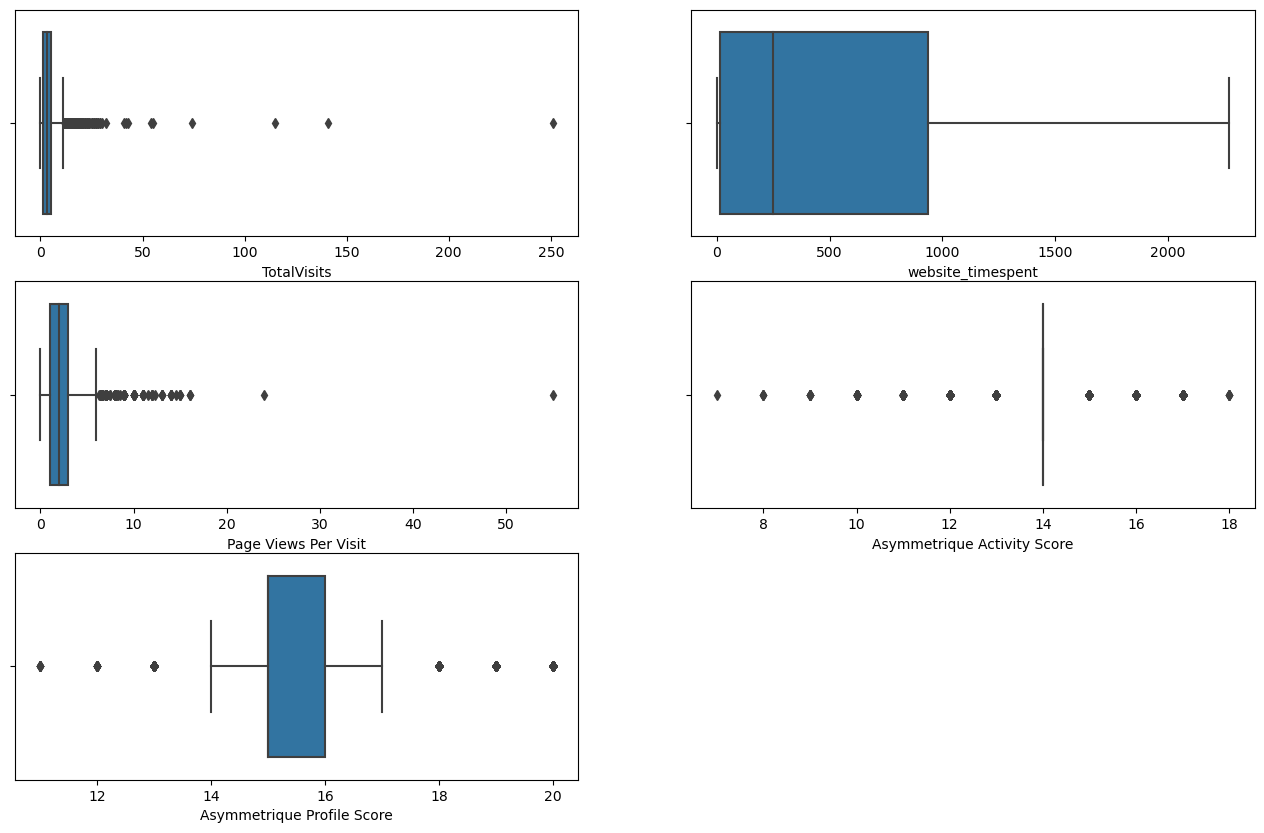

In [27]:
plt.figure(figsize=(16,10))
for i,column in enumerate(numerical_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(x = lead_df[column])
plt.show()

### Observations:

Outliers are present in the columns totalvist, page views per vist, asymmetric activity and profile score so we need to focus on these columns and we need to do detail analysis for outlier treatment 

In [28]:
lead_df[numerical_columns].describe(percentiles=[0.05,0.10,0.2,0.25,0.5,0.75,0.80,0.90,0.95,0.99])

,TotalVisits,website_timespent,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440,14.166450,15.730952
std,4.819024,548.021466,2.145781,1.033585,1.493977
min,0.000000,0.000000,0.000000,7.000000,11.000000
5%,0.000000,0.000000,0.000000,13.000000,15.000000
10%,0.000000,0.000000,0.000000,13.000000,15.000000
20%,0.000000,0.000000,0.000000,14.000000,15.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,15.000000
75%,5.000000,936.000000,3.000000,14.000000,16.000000


In [29]:
def outliertreatment(column,l,u):
    lower = lead_df[column].quantile(l)
    upper = lead_df[column].quantile(u)
    lead_df[column] = np.where(lead_df[column]<lower,lower, lead_df[column])
    lead_df[column] = np.where(lead_df[column]>upper,upper, lead_df[column])   

In [30]:
# capping the outliers with lower and upper bound values (which varies from one column to the other)
outliertreatment('TotalVisits',.25,.95)
outliertreatment('Page Views Per Visit',.25,.95)
outliertreatment('Asymmetrique Activity Score',.05,0.90)
outliertreatment('Asymmetrique Profile Score',0.25,.90)

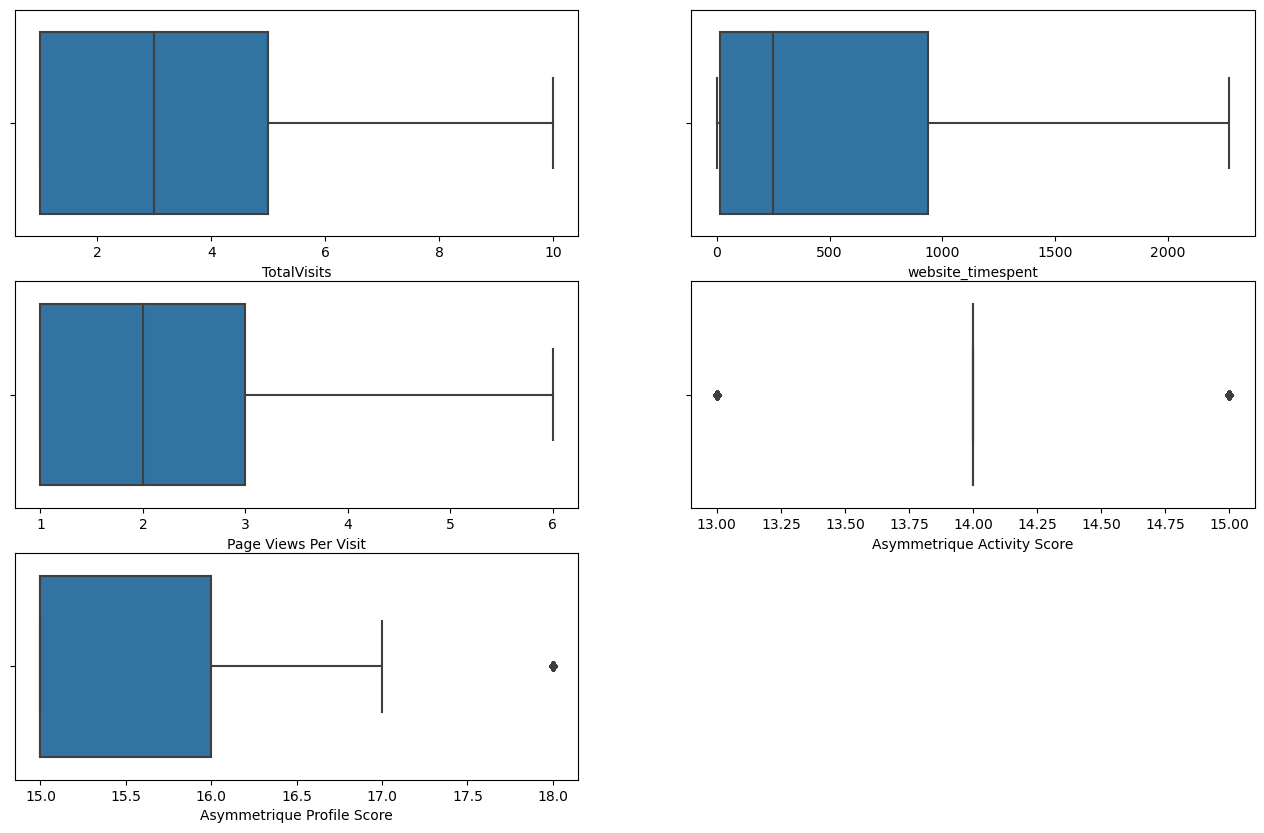

In [31]:
plt.figure(figsize=(16,10))
for i,column in enumerate(numerical_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(x = lead_df[column])
plt.show()

In [32]:
lead_df[numerical_columns].describe(percentiles=[0.05,0.10,0.2,0.25,0.5,0.75,0.80,0.90,0.95,0.99])

,TotalVisits,website_timespent,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9240.00000,9240.000000,9240.000000
mean,3.416126,487.698268,2.49201,14.105736,15.717424
std,2.509706,548.021466,1.50954,0.583692,1.175902
min,1.000000,0.000000,1.00000,13.000000,15.000000
5%,1.000000,0.000000,1.00000,13.000000,15.000000
10%,1.000000,0.000000,1.00000,13.000000,15.000000
20%,1.000000,0.000000,1.00000,14.000000,15.000000
25%,1.000000,12.000000,1.00000,14.000000,15.000000
50%,3.000000,248.000000,2.00000,14.000000,15.000000
75%,5.000000,936.000000,3.00000,14.000000,16.000000


#### It is better to drop the asymmetrique activity score as most of the data lies in the range 14 and 15

In [33]:
lead_df.drop("Asymmetrique Activity Score",axis=1)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,website_timespent,Page Views Per Visit,Last Activity,Country,Specialization,occupation,motto,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Profile Score,freecopy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,1.0,0,1.00,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Mumbai,02.Medium,02.Medium,15.0,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,02.Medium,02.Medium,15.0,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,18.0,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,02.Medium,01.High,17.0,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,18.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,17.0,No
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,wrong number given,Mumbai,02.Medium,01.High,18.0,Yes
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,invalid number,Mumbai,02.Medium,01.High,18.0,Yes
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Other Metro Cities,02.Medium,02.Medium,16.0,No


# Bi-variate analysis

## Bi-variate analysis for Categorical columns

In [34]:
def bivariate_categorical(columns,x,y,degree):
    plt.figure(figsize=(x,y))
    for i,column in enumerate(columns):
        plt.subplot(2,2,i+1)
        plt.xticks(rotation = degree)
        sns.countplot(data=lead_df,x=column, hue="Converted")
    plt.show()    

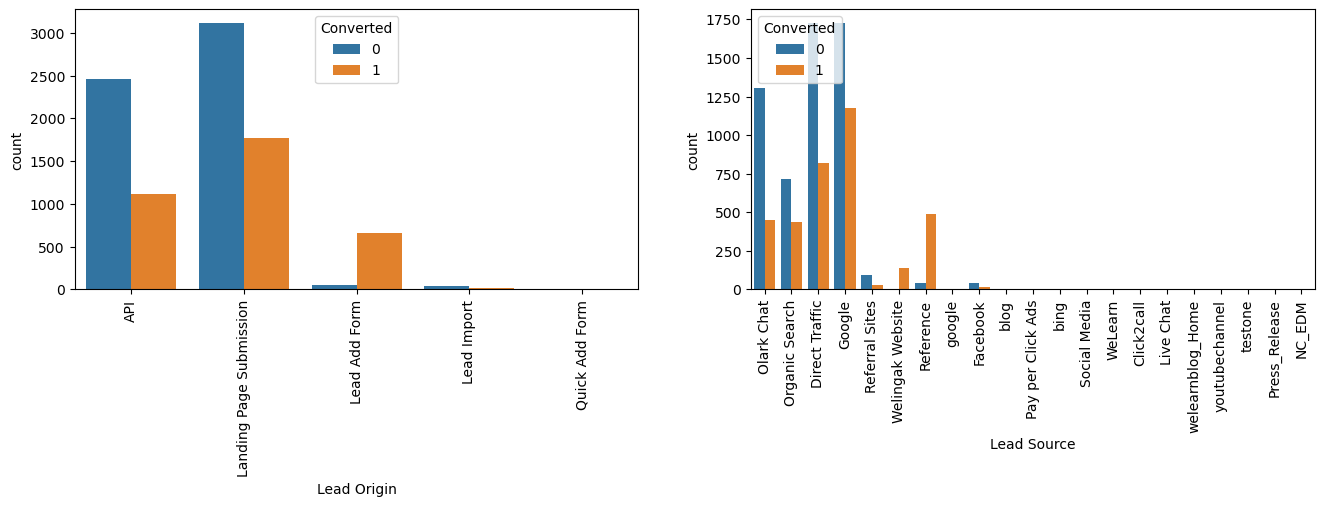

In [35]:
bivariate_categorical(catogerical_columns[:2],16,8, 90)

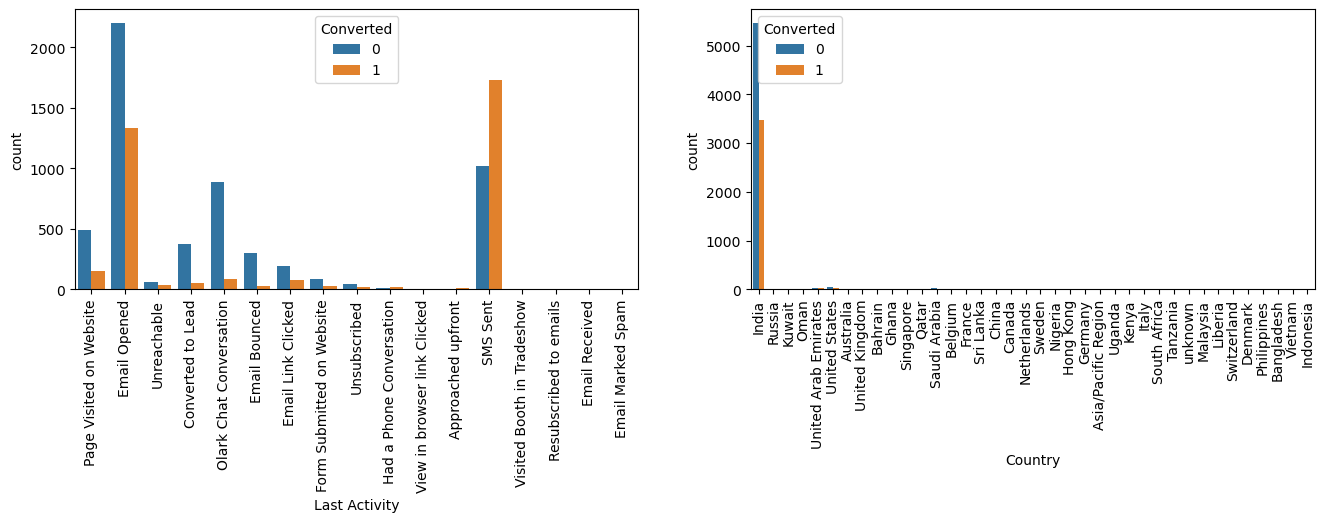

In [36]:
bivariate_categorical(catogerical_columns[4:6],16,8,90)

### Observations:
Most number of converted memebrs has landing page as lead origin, google as a lead source, sms set as last activity and are from country india

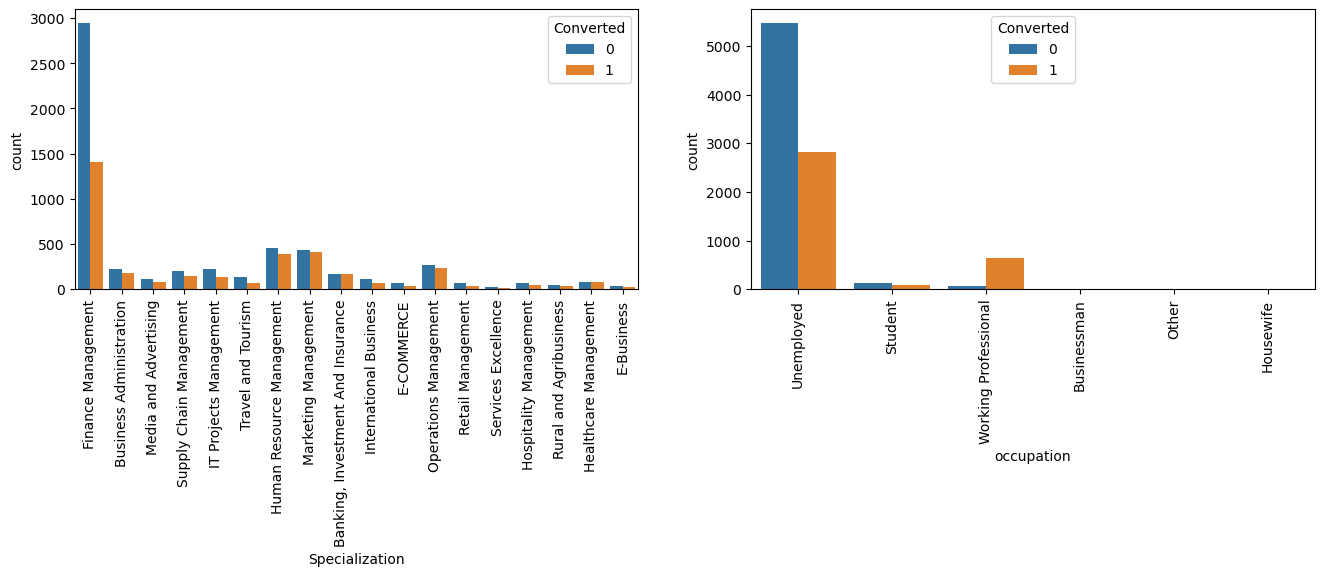

In [37]:
bivariate_categorical(catogerical_columns[6:8],16,8,90)

### Observations:
Most number of converted memebrs are from finance management as specialisation, unemployed as occupation.
We should mainly focus on the unemployed people because thier conversion rate is higher when compared to working professionals

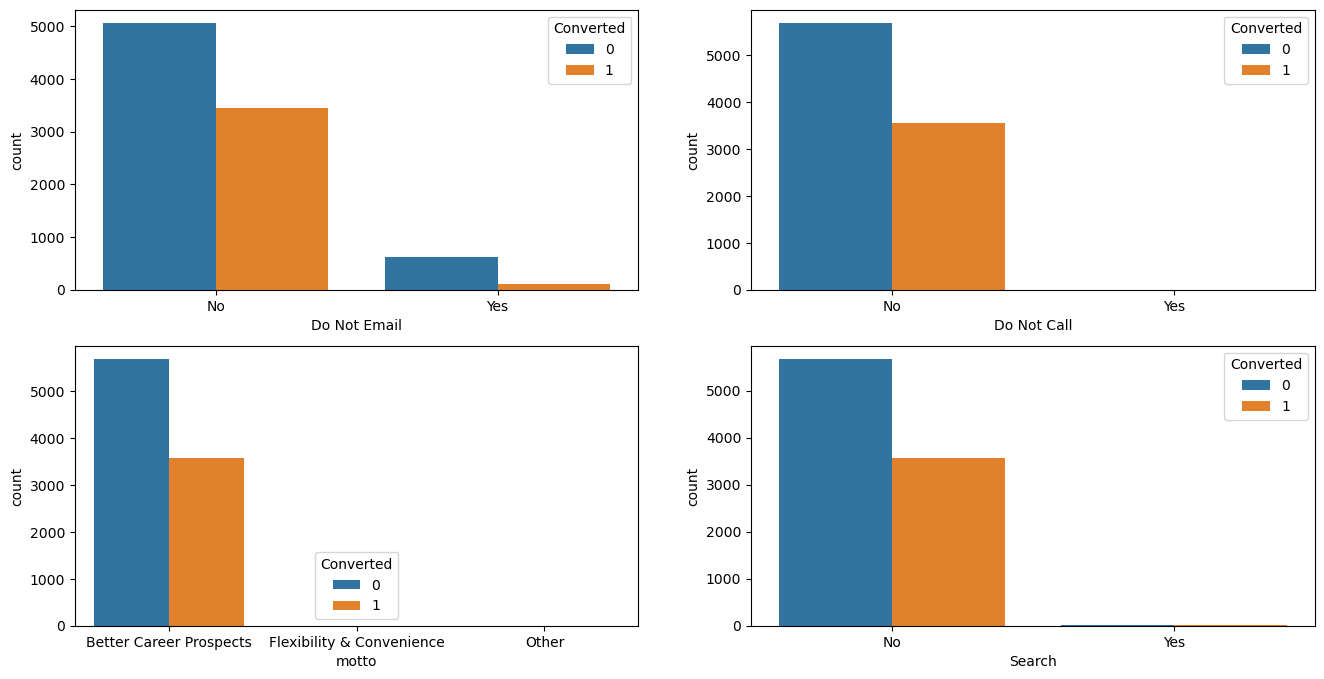

In [38]:
bivariate_categorical(catogerical_columns[2:4]+ catogerical_columns[8:10],16,8,0)

### Observations:
Leads who are okay to get the course details through emails and calls have high chance of saying okay to the course
and whose motto is for 'better career prospect' are high chance of being converted

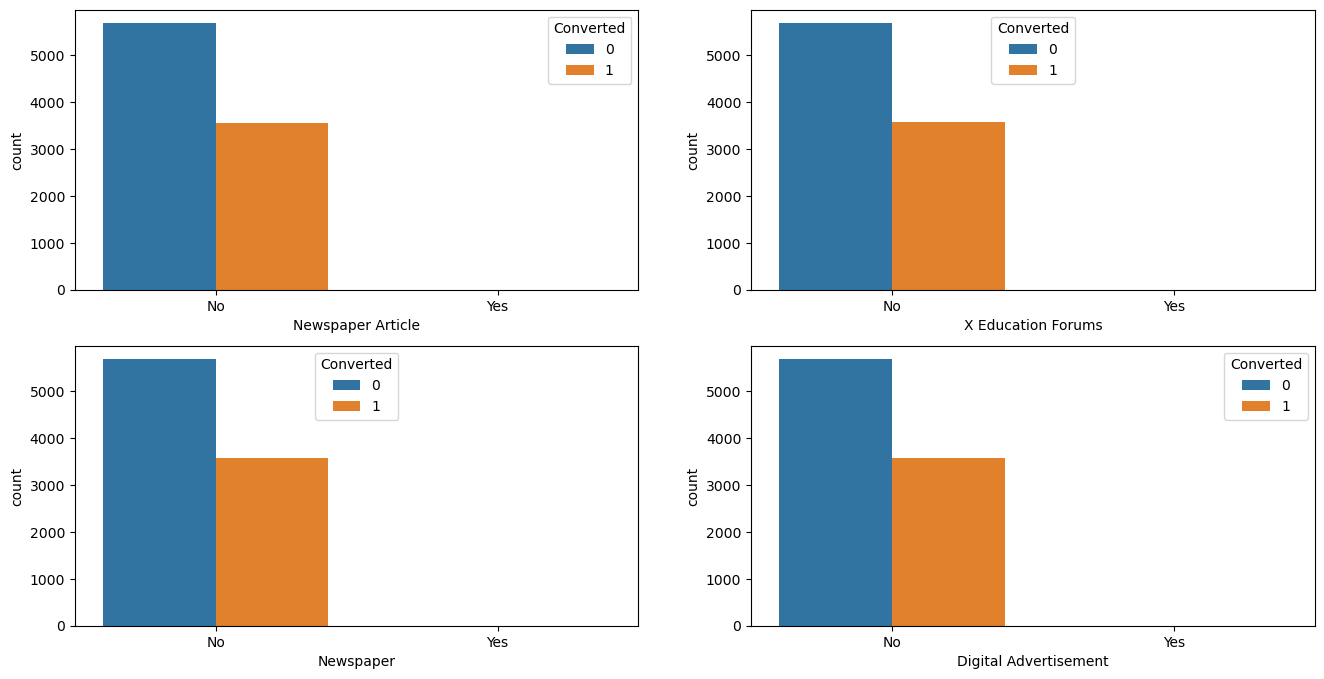

In [39]:
bivariate_categorical(catogerical_columns[10:14],16,8,0)

### Observations:
Most number of converted/not converted members are the people who are not using newspaper,digital advertisement and Xeducation forums

In [40]:
lead_df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [41]:
lead_df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

#### Data in both Newspaper and Newspaper Article are almost equal and it is better to drop one of the column as they add same value in the output prediction

In [42]:
lead_df.drop(['Newspaper Article'], axis = 1, inplace= True)

In [43]:
lead_df.shape

(9240, 26)

#### For better readability and understading of levels in the columns asymmetric profile and activity index we change the values

In [44]:
def label_map(x):
    return x.map({'02.Medium':"Medium", '01.High':"High", '03.Low':"Low"})  

In [45]:
lead_df[['Asymmetrique Activity Index','Asymmetrique Profile Index']] = lead_df[['Asymmetrique Activity Index','Asymmetrique Profile Index']].apply(label_map)

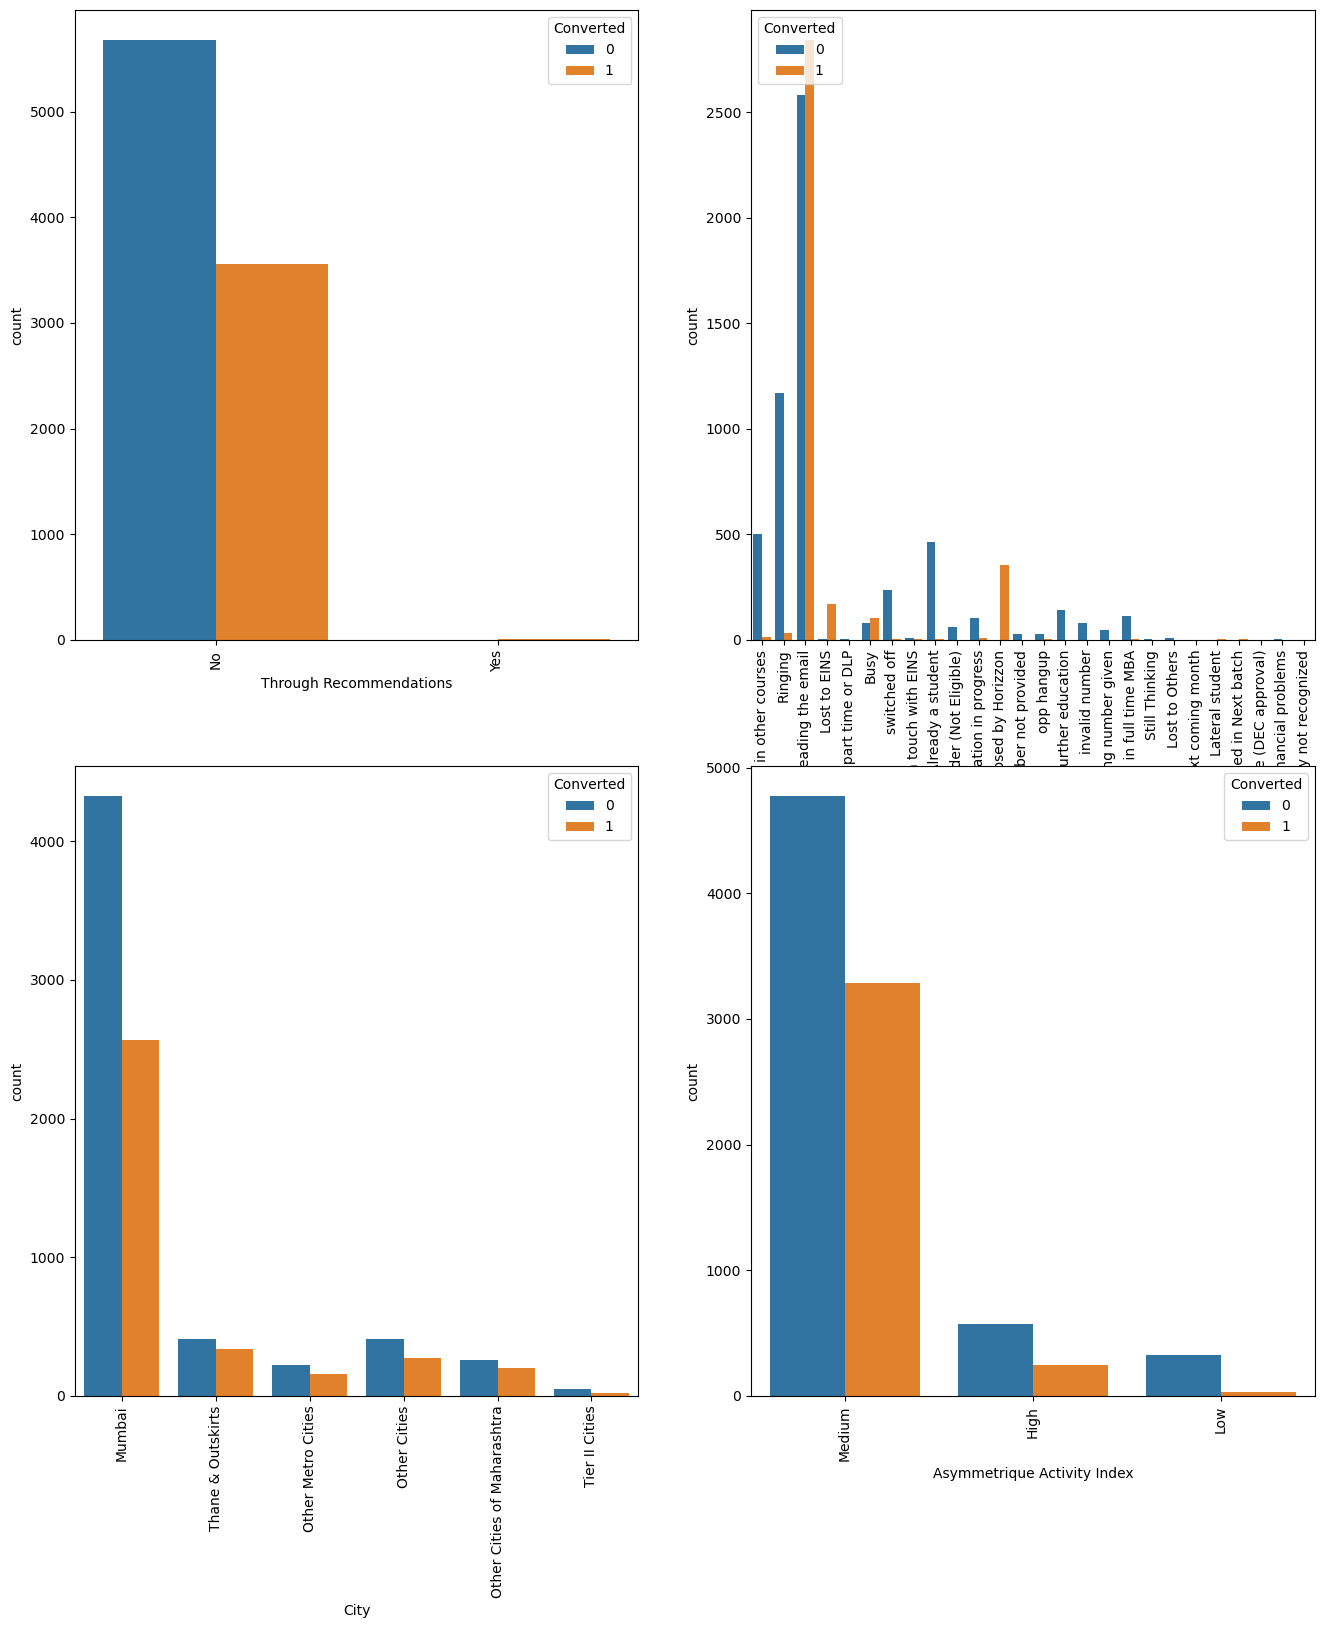

In [46]:
bivariate_categorical(catogerical_columns[14:18],16,18,90)

### Observations
Leads who are reading and responding to mails, whose activity index is medium and are not recommended by other people are the ones who joined.
Most of the people who are in maharashtra are more likely to enroll

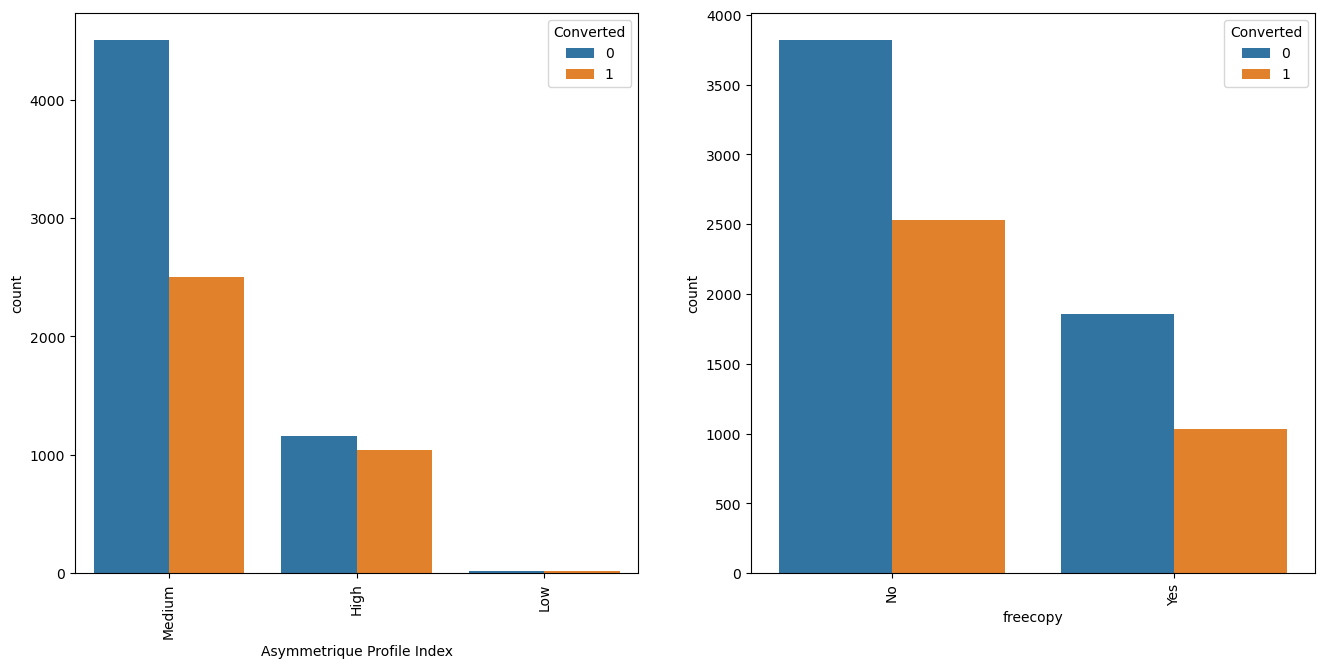

In [47]:
bivariate_categorical(catogerical_columns[18:22],16,16,90)

### Observations:
Most number of members who are intersted in free copy, whose profile index is of medium and contacted through sms have high chance of getting enrolled in the course

## Bi-variate analysis for numerical columns

In [48]:
numerical_columns

['TotalVisits',
 'website_timespent',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [49]:
def bivariate_numerical(columns,x,y,degree):
    plt.figure(figsize=(x,y))
    for i,column in enumerate(columns):
        plt.subplot(3,2,i+1)
        plt.xticks(rotation = degree)
        sns.boxplot(data=lead_df,y=column, x="Converted")
    plt.show()    

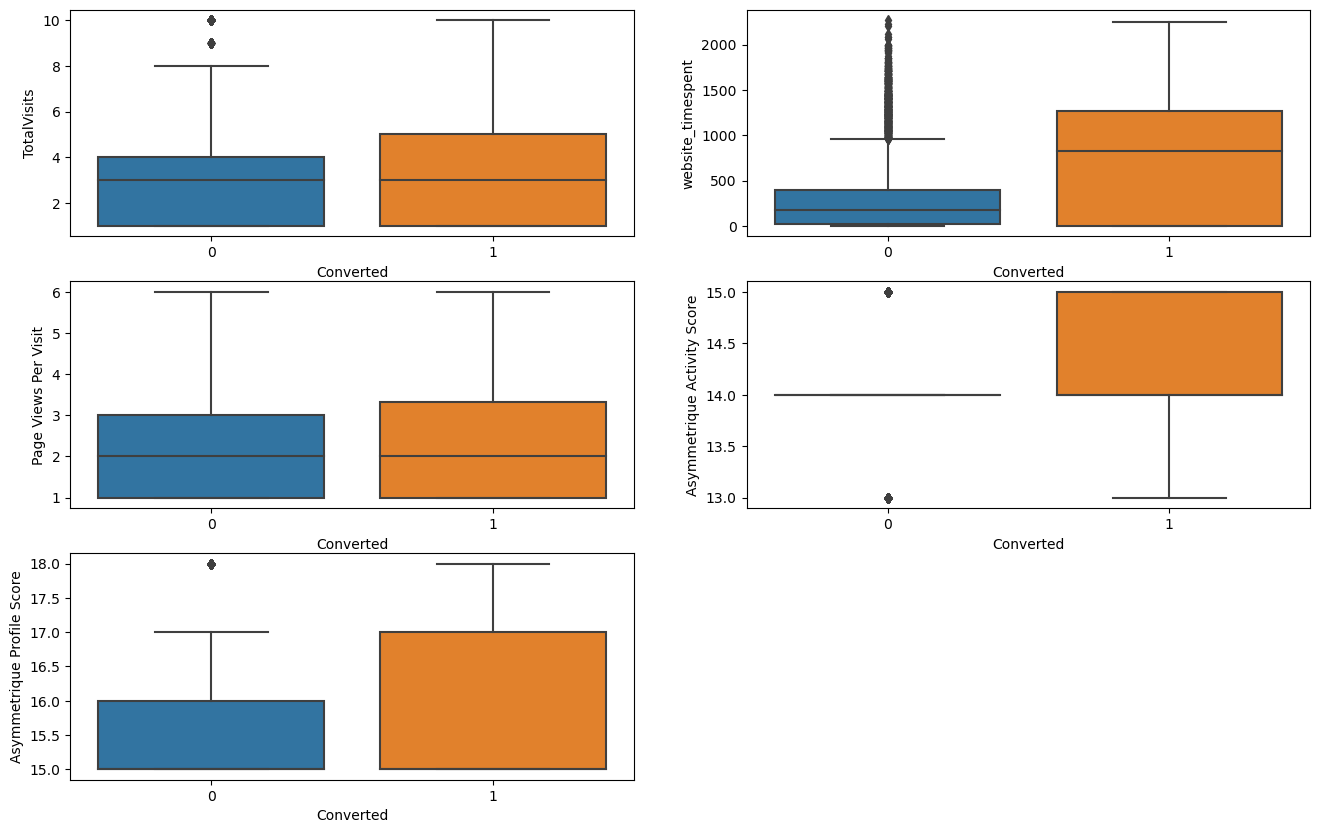

In [50]:
bivariate_numerical(numerical_columns,16,10,0)

### Observations:
 Most number of converted members total visits and website_timespent are high. 
 Median of both converted and not converted is almost same in the case of page views per visit.
 If asymmetric activity score more than 14 and profile score' is greater than 16, chances of conversion is high

# Multivariate analysis

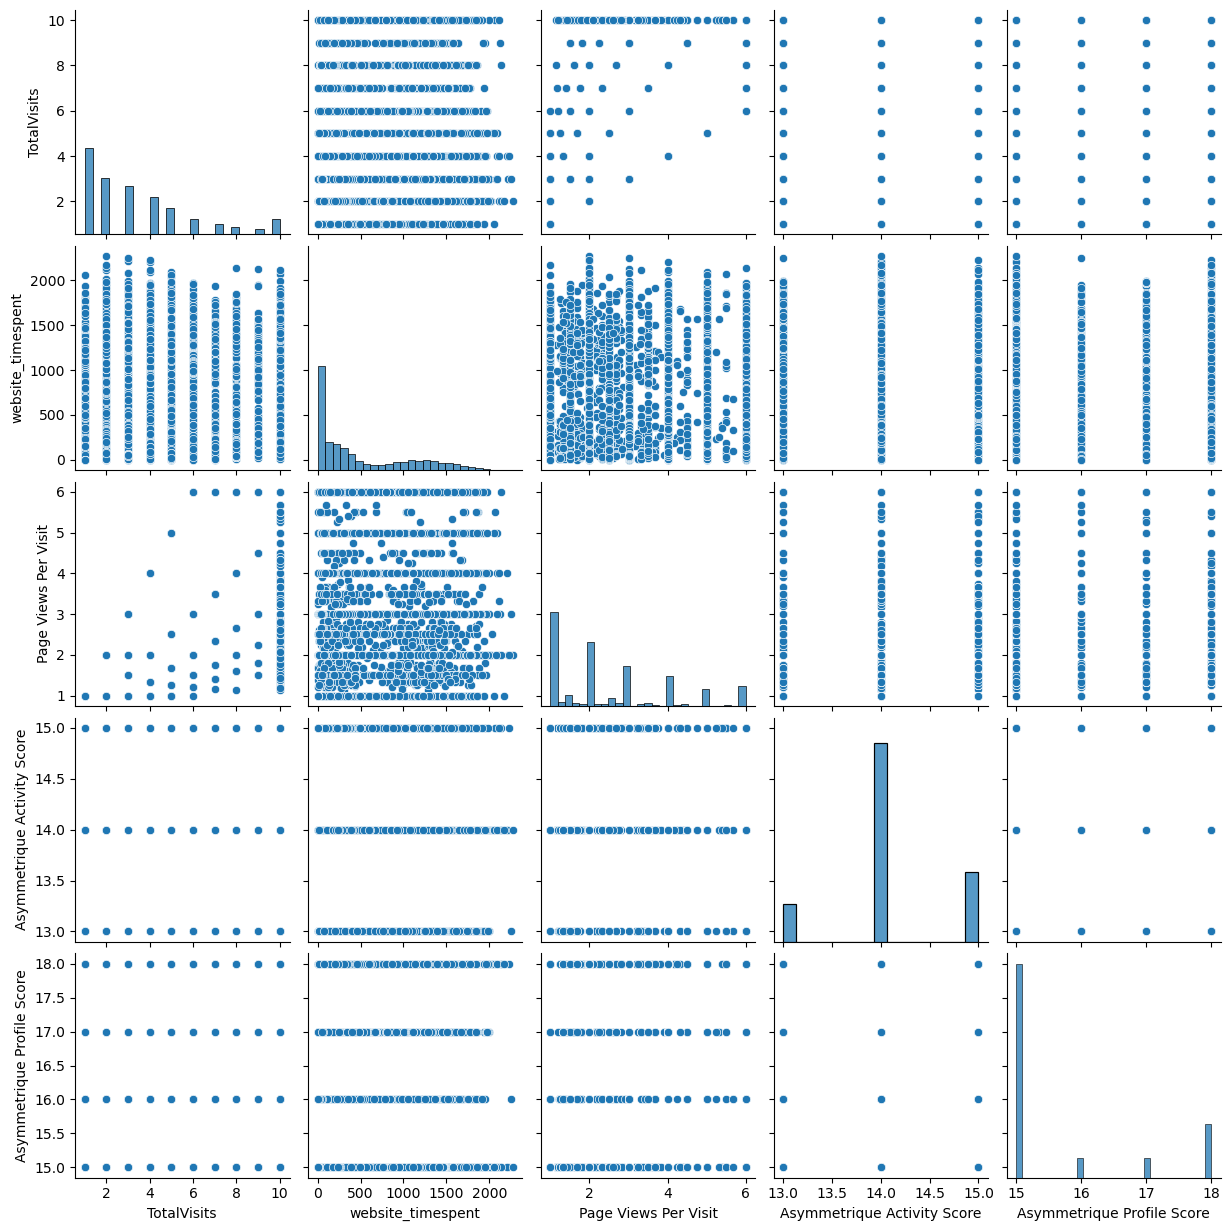

In [51]:
sns.pairplot(lead_df[numerical_columns])
plt.show()

### Observations:
1. The distribution of total amount of time spent on the website is same across the people with n number of visits
2. There is a linear relationship between page views per visit and total visits

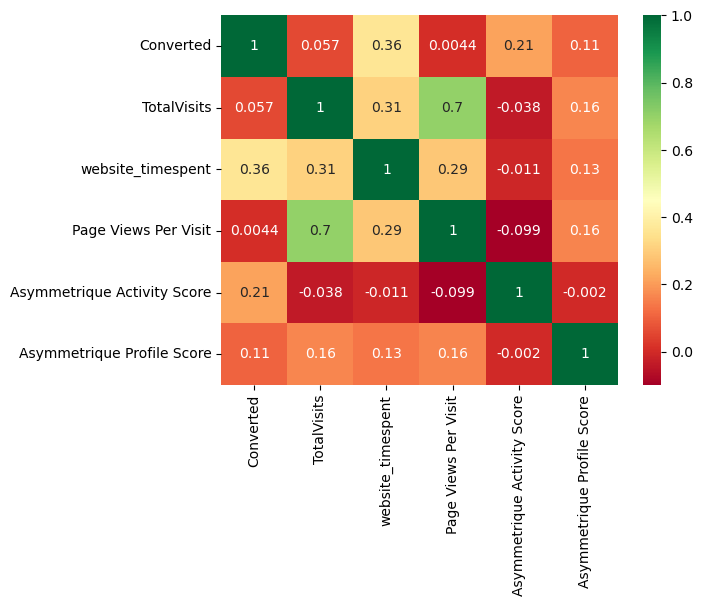

In [52]:
correlation = lead_df.corr()
sns.heatmap(correlation, cmap="RdYlGn", annot= True)
plt.show()

### Observations:
output/target variable has high corrleation with website_timesepent

# Data Preparation

In [53]:
yesno_columns = ['Do Not Email','Do Not Call','Search','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','freecopy']

In [54]:
def binary_map(x):
    return x.map({"Yes":1, "No":0})

In [55]:
# Converting categorical to numerical column
lead_df[yesno_columns] = lead_df[yesno_columns].apply(binary_map)

In [56]:
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,website_timespent,Page Views Per Visit,Last Activity,Country,Specialization,occupation,motto,Search,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,freecopy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,1.0,0,1.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,Interested in other courses,Mumbai,Medium,Medium,15.0,15.0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,Ringing,Mumbai,Medium,Medium,15.0,15.0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,Will revert after reading the email,Mumbai,Medium,High,14.0,18.0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,Ringing,Mumbai,Medium,High,13.0,17.0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,Will revert after reading the email,Mumbai,Medium,High,15.0,18.0,0


#### Nominal Categorial variables with multiple levels are converted into numerical by using one hot encoding and ordinal variables with lablel encoding

In [57]:
encoding_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'occupation', 'motto', 'Tags', 'City']

In [58]:
#creating an instance
label_encoder = LabelEncoder()

In [59]:
lead_df['Asymmetrique Activity Index'] = label_encoder.fit_transform(lead_df['Asymmetrique Activity Index'])

In [60]:
lead_df['Asymmetrique Profile Index'] = label_encoder.fit_transform(lead_df['Asymmetrique Profile Index'])

In [61]:
lead_df['Asymmetrique Activity Index'].value_counts()

2    8057
0     821
1     362
Name: Asymmetrique Activity Index, dtype: int64

In [62]:
lead_df['Asymmetrique Profile Index'].value_counts()

2    7006
0    2203
1      31
Name: Asymmetrique Profile Index, dtype: int64

In [63]:
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,website_timespent,Page Views Per Visit,Last Activity,Country,Specialization,occupation,motto,Search,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,freecopy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,1.0,0,1.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,Interested in other courses,Mumbai,2,2,15.0,15.0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,Ringing,Mumbai,2,2,15.0,15.0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,Will revert after reading the email,Mumbai,2,0,14.0,18.0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,Ringing,Mumbai,2,0,13.0,17.0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,Will revert after reading the email,Mumbai,2,0,15.0,18.0,0


In [64]:
lead_df.shape

(9240, 26)

#### Creating Dummy Variables

In [65]:
dummies = pd.get_dummies(lead_df[encoding_columns],drop_first = True)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,motto_Flexibility & Convenience,motto_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [66]:
#number of columns created after one hot encoding the columns 
dummies.shape

(9240, 131)

In [67]:
lead_df = pd.concat([lead_df, dummies],axis=1)

In [68]:
lead_df.shape

(9240, 157)

#### dropping the columns which are already one hot encoded

In [69]:
lead_df= lead_df.drop(encoding_columns,axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,website_timespent,Page Views Per Visit,Search,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,freecopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,motto_Flexibility & Convenience,motto_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,1.0,0,1.0,0,0,0,0,0,2,2,15.0,15.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482

In [70]:
lead_df.shape

(9240, 148)

## Data Imbalance check

In [71]:
round(lead_df["Converted"].value_counts(normalize=True)*100,2)

0    61.46
1    38.54
Name: Converted, dtype: float64

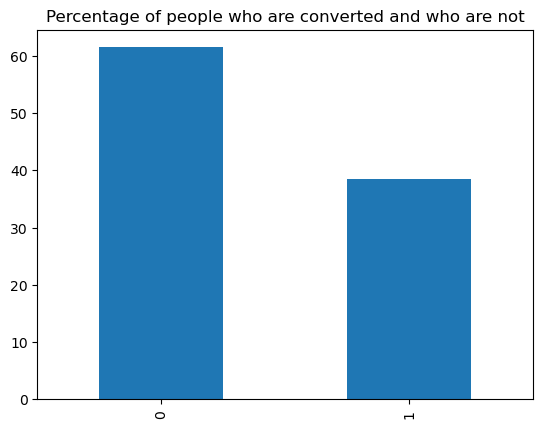

In [72]:
plt.title("Percentage of people who are converted and who are not")
round(lead_df["Converted"].value_counts(normalize=True)*100,2).plot(kind= 'bar')
plt.show()

#### Here we have less number of data of people who enrolled in the course when compared to who are not. There is a slight imbalance in the data but it is fine to proceed further.

In [73]:
#removing the unique column as it has no impact in the model
lead_df = lead_df.drop("Prospect ID",axis=1)

In [74]:
y = lead_df["Converted"]
X = lead_df.drop("Converted",axis=1)

In [75]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,website_timespent,Page Views Per Visit,Search,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,freecopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,motto_Flexibility & Convenience,motto_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,1.0,0,1.0,0,0,0,0,0,2,2,15.0,15.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,2,2,15.0,15.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Train-Test Split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3, random_state= 100)

In [78]:
print("X_train shape: {}, X_test shape:{}".format(X_train.shape,X_test.shape))
print("y_train shape: {}, y_test shape:{}".format(y_train.shape,y_test.shape))

X_train shape: (6468, 146), X_test shape:(2772, 146)
y_train shape: (6468,), y_test shape:(2772,)


## Feature Scaling

 Scaling numerical columns so that model can be easily built

In [79]:
X_train[numerical_columns].describe()

,TotalVisits,website_timespent,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,3.409091,483.875850,2.481770,14.107761,15.717069
std,2.509655,546.565663,1.504176,0.581118,1.173666
min,1.000000,0.000000,1.000000,13.000000,15.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,246.000000,2.000000,14.000000,15.000000
75%,5.000000,926.500000,3.000000,14.000000,16.000000
max,10.000000,2272.000000,6.000000,15.000000,18.000000


In [80]:
# creating an instance
scaler = StandardScaler()

#scaling 
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

In [81]:
X_train[numerical_columns].describe()

,TotalVisits,website_timespent,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03
mean,-1.288566e-16,-1.609377e-16,4.447415e-17,-1.437265e-15,7.473923e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-9.600034e-01,-8.853708e-01,-9.851807e-01,-1.906408e+00,-6.110122e-01
25%,-9.600034e-01,-8.634138e-01,-9.851807e-01,-1.854524e-01,-6.110122e-01
50%,-1.630194e-01,-4.352528e-01,-3.203133e-01,-1.854524e-01,-6.110122e-01
75%,6.339645e-01,8.098906e-01,3.445540e-01,-1.854524e-01,2.410850e-01
max,2.626424e+00,3.271816e+00,2.339156e+00,1.535503e+00,1.945280e+00


# Model Building

#### First training model

In [82]:
import statsmodels.api as sm

In [83]:
# Logistic Regression Model
X_train_sm = sm.add_constant(X_train)
log_m1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                          140
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.2
Date:                Mon, 27 Feb 2023   Deviance:                       3190.4
Time:                        16:28:51   Pearson chi2:                 1.37e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5666
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     12.4159   7.07e+04      0.000      1.000   -1.39e+05    1.39e+05
Do Not Email                                              -1.1622      0.273     -4.252      0.000      -1.698      -0.626
Do Not Call                                               20.7933   1.36e+05      0.000      1.000   -2.66e+05    2.66e+05
TotalVisits                                                0.2303      0.068      3.380      0.001       0.097       0.364
website_timespent                                          1.1374      0.055     20.533      0.000       1.029       1.246
Page Views Per Visit                                      -0.2282      0.070     -3.271      0.001      -0.365      -0.091
Search                                                    -0.0549      1.473     -0.037      0.970      -2.943       2.833
X Education Forums                                        -3.8281   2.55e+05   -1.5e-05      1.000      -5e+05       5e+05
Newspaper                                                -23.0283   2.11e+05     -0.000      1.000   -4.13e+05    4.13e+05
Digital Advertisement                                    -23.7741   1.35e+05     -0.000      1.000   -2.65e+05    2.65e+05
Through Recommendations                                    2.2286      4.466      0.499      0.618      -6.525      10.982
Asymmetrique Activity Index                                0.5068      0.088      5.760      0.000       0.334       0.679
Asymmetrique Profile Index                                 0.2626      0.217      1.208      0.227      -0.164       0.689
Asymmetrique Activity Score                                0.9168      0.061     15.001      0.000       0.797       1.037
Asymmetrique Profile Score                                 0.3890      0.186      2.095      0.036       0.025       0.753
freecopy                                                  -0.2237      0.150     -1.488      0.137      -0.518       0.071
Lead Origin_Landing Page Submission                       -0.5564      0.169     -3.286      0.001      -0.888      -0.225
Lead Origin_Lead Add Form                                  2.1874      0.652      3.353      0.001       0.909       3.466
Lead Origin_Lead Import                                   20.8756   3.24e+04      0.001      0.999   -6.34e+04    6.35e+04
Lead Origin_Quick Add Form                                23.6002   2.13e+05      0.000      1.000   -4.18e+05    4.18e+05
Lead Source_Direct Traffic                                -0.2928      1.501     -0.195      0.845      -3.236       2.650
Lead Source_Facebook                                     -21.9102   3.24e+04     -0.001      0.999   -6.35e+04    6.34e+04
Lead Sou

## Feature Selection using RFE

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [85]:
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select= 30)
rfe = rfe.fit(X_train, y_train)

In [86]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
       False, False,

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 91),
 ('TotalVisits', False, 51),
 ('website_timespent', True, 1),
 ('Page Views Per Visit', False, 52),
 ('Search', False, 74),
 ('X Education Forums', False, 49),
 ('Newspaper', False, 86),
 ('Digital Advertisement', False, 29),
 ('Through Recommendations', False, 103),
 ('Asymmetrique Activity Index', False, 26),
 ('Asymmetrique Profile Index', False, 59),
 ('Asymmetrique Activity Score', False, 4),
 ('Asymmetrique Profile Score', False, 58),
 ('freecopy', False, 45),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Origin_Quick Add Form', False, 73),
 ('Lead Source_Direct Traffic', False, 60),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 72),
 ('Lead Source_Live Chat', False, 88),
 ('Lead Source_NC_EDM', False, 54),
 ('Lead Source_Olark Chat', False, 31),
 ('Lead Source_Organic Search', False, 71),
 ('Lead Source_P

In [88]:
col = X_train.columns[rfe.support_]

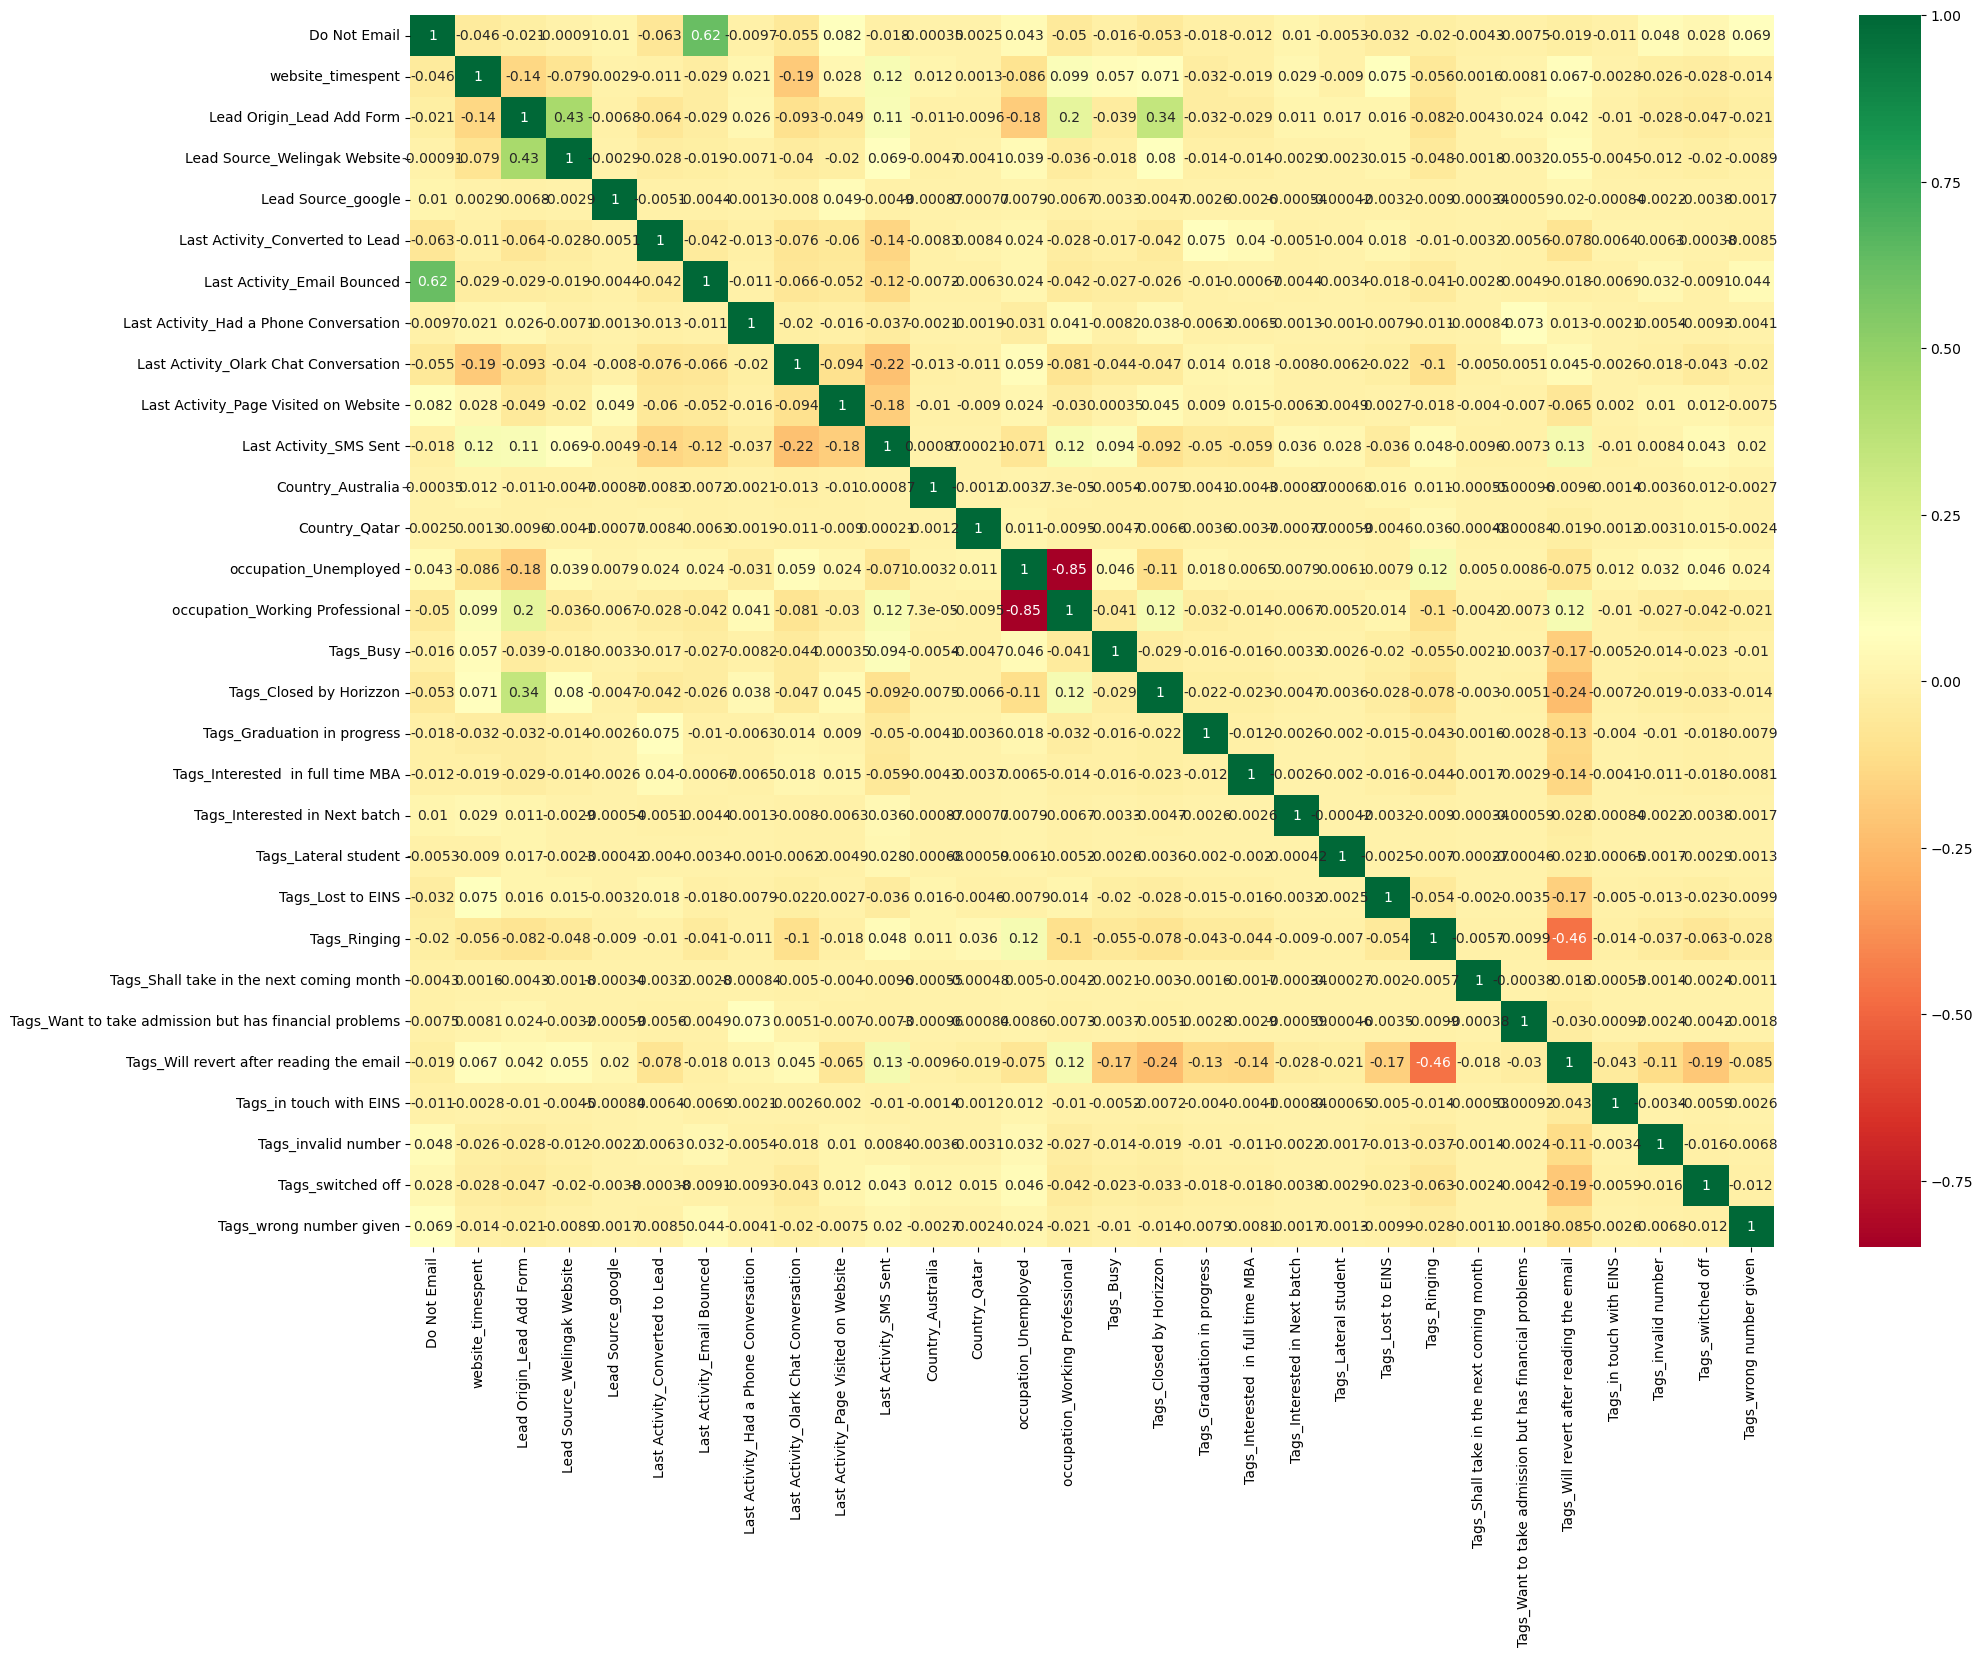

In [89]:
#checking correlation as a reference, if required in further analysis
plt.figure(figsize=(22,16))
sns.heatmap(X[col].corr(), annot= True, cmap="RdYlGn")
plt.show()

In [90]:
X_train_sm = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = log_m2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1841.3
Date:                Mon, 27 Feb 2023   Deviance:                       3682.7
Time:                        16:29:16   Pearson chi2:                 1.26e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5323
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.0218      0.387     -7.812      0.000      -3.780      -2.264
Do Not Email                                              -1.1759      0.223     -5.275      0.000      -1.613      -0.739
website_timespent                                          0.9921      0.044     22.309      0.000       0.905       1.079
Lead Origin_Lead Add Form                                  2.8119      0.241     11.676      0.000       2.340       3.284
Lead Source_Welingak Website                               1.5898      0.775      2.052      0.040       0.072       3.108
Lead Source_google                                       -24.0453   5.49e+04     -0.000      1.000   -1.08e+05    1.08e+05
Last Activity_Converted to Lead                           -1.5099      0.276     -5.477      0.000      -2.050      -0.970
Last Activity_Email Bounced                               -1.1317      0.388     -2.914      0.004      -1.893      -0.371
Last Activity_Had a Phone Conversation                     1.6314      0.748      2.180      0.029       0.164       3.098
Last Activity_Olark Chat Conversation                     -1.3477      0.179     -7.518      0.000      -1.699      -0.996
Last Activity_Page Visited on Website                     -0.9087      0.184     -4.949      0.000      -1.269      -0.549
Last Activity_SMS Sent                                     1.5160      0.097     15.675      0.000       1.326       1.706
Country_Australia                                         -3.0372      1.352     -2.247      0.025      -5.686      -0.388
Country_Qatar                                            -23.5251   3.46e+04     -0.001      0.999   -6.78e+04    6.78e+04
occupation_Unemployed                                     -1.4112      0.328     -4.301      0.000      -2.054      -0.768
occupation_Working Professional                            1.4792      0.402      3.682      0.000       0.692       2.267
Tags_Busy                                                  3.4640      0.348      9.953      0.000       2.782       4.146
Tags_Closed by Horizzon                                    8.9851      1.056      8.510      0.000       6.916      11.054
Tags_Graduation in progress                                2.0836      0.587      3.552      0.000       0.934       3.233
Tags_Interested  in full time MBA                         -0.4058      0.882     -0.460      0.645      -2.134       1.323
Tags_Interested in Next batch                             26.5562    5.2e+04      0.001      1.000   -1.02e+05    1.02e+05
Tags_Lateral student                                      27.4303   7.03e+04      0.000      1.000   -1.38e+05    1.38e+05
Tags_Los

In [91]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm)
y_train_pred[:10]

1871    0.003418
6795    0.385109
3516    0.004140
8105    0.127130
3934    0.205556
4844    0.996923
3297    0.003986
8071    0.999991
987     0.200613
7423    0.952631
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00341793, 0.38510921, 0.0041401 , 0.1271301 , 0.20555637,
       0.99692349, 0.00398587, 0.99999107, 0.20061343, 0.95263113])

### Creating a data frame with the actual churn flag and the predicted probabilities

In [93]:
y_trian_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})
y_trian_pred_df.head()

,Id,converted,conversion_probability
0,1871,0,0.003418
1,6795,0,0.385109
2,3516,0,0.004140
3,8105,0,0.127130
4,3934,0,0.205556


#### Creating a new column predicted with 1 if conversion_probability >= 0.8(as mentioned in the problem statement)

In [94]:
y_trian_pred_df["predicted"] = y_trian_pred_df["conversion_probability"].map(lambda x: 1 if x >=0.8 else 0)
y_trian_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003418,0
1,6795,0,0.385109,0
2,3516,0,0.004140,0
3,8105,0,0.127130,0
4,3934,0,0.205556,0


### Calculating the accuracy of the model

In [95]:
from sklearn import metrics

In [96]:
# confusion matrix
confusion = metrics.confusion_matrix(y_trian_pred_df.converted, y_trian_pred_df.predicted)
confusion

array([[3913,   89],
       [ 946, 1520]], dtype=int64)

In [97]:
#accuracy
print("Accuracy of the model:", round(metrics.accuracy_score(y_trian_pred_df.converted, y_trian_pred_df.predicted)*100,2))

Accuracy of the model: 84.0


##### Here we have accuracy of the model almost equal to 85 percent

### Checking VIF

In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calculateVIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [100]:
calculateVIF(col)

,Features,VIF
13,occupation_Unemployed,7.65
25,Tags_Will revert after reading the email,5.38
22,Tags_Ringing,2.03
0,Do Not Email,1.89
6,Last Activity_Email Bounced,1.84
10,Last Activity_SMS Sent,1.84
14,occupation_Working Professional,1.76
2,Lead Origin_Lead Add Form,1.65
16,Tags_Closed by Horizzon,1.51
8,Last Activity_Olark Chat Conversation,1.30


Let us drop the variable with high VIF and create a model on the remaining features and check its performance

In [101]:
col = col.drop('occupation_Unemployed')
col

Index(['Do Not Email', 'website_timespent', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Country_Australia', 'Country_Qatar', 'occupation_Working Professional',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

### Building a new model on the modified columns

In [102]:
X_train[col].head()

,Do Not Email,website_timespent,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_Qatar,occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Shall take in the next coming month,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_switched off,Tags_wrong number given
1871,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6795,0,0.005716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3516,0,-0.691418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8105,0,1.365219,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3934,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [103]:
# Third model
X_train_sm = sm.add_constant(X_train[col])

log_m3 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m3.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1851.0
Date:                Mon, 27 Feb 2023   Deviance:                       3702.0
Time:                        16:29:17   Pearson chi2:                 1.26e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5309
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.2933      0.273    -15.736      0.000      -4.828      -3.759
Do Not Email                                              -1.1676      0.223     -5.235      0.000      -1.605      -0.730
website_timespent                                          0.9960      0.044     22.426      0.000       0.909       1.083
Lead Origin_Lead Add Form                                  2.8689      0.238     12.060      0.000       2.403       3.335
Lead Source_Welingak Website                               1.5060      0.772      1.950      0.051      -0.008       3.020
Lead Source_google                                       -24.0726   5.49e+04     -0.000      1.000   -1.08e+05    1.08e+05
Last Activity_Converted to Lead                           -1.5018      0.275     -5.465      0.000      -2.040      -0.963
Last Activity_Email Bounced                               -1.0780      0.389     -2.768      0.006      -1.841      -0.315
Last Activity_Had a Phone Conversation                     1.6101      0.750      2.148      0.032       0.141       3.079
Last Activity_Olark Chat Conversation                     -1.3580      0.179     -7.605      0.000      -1.708      -1.008
Last Activity_Page Visited on Website                     -0.9089      0.183     -4.957      0.000      -1.268      -0.550
Last Activity_SMS Sent                                     1.5018      0.096     15.583      0.000       1.313       1.691
Country_Australia                                         -3.0423      1.348     -2.257      0.024      -5.684      -0.400
Country_Qatar                                            -23.5444   3.46e+04     -0.001      0.999   -6.78e+04    6.78e+04
occupation_Working Professional                            2.8422      0.249     11.413      0.000       2.354       3.330
Tags_Busy                                                  3.3434      0.345      9.684      0.000       2.667       4.020
Tags_Closed by Horizzon                                    8.8590      1.055      8.401      0.000       6.792      10.926
Tags_Graduation in progress                                1.9897      0.588      3.381      0.001       0.836       3.143
Tags_Interested  in full time MBA                         -0.3952      0.885     -0.447      0.655      -2.130       1.339
Tags_Interested in Next batch                             26.4167   5.19e+04      0.001      1.000   -1.02e+05    1.02e+05
Tags_Lateral student                                      27.3003   7.01e+04      0.000      1.000   -1.37e+05    1.37e+05
Tags_Lost to EINS                                          8.4637      0.781     10.835      0.000       6.933       9.995
Tags_Rin

In [104]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003414,0
1,6795,0,0.391437,0
2,3516,0,0.004138,0
3,8105,0,0.126413,0
4,3934,0,0.209356,0


In [105]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3914   88]
 [ 947 1519]]
Acuuracy of the model: 84.0


 The accuracy of the 3rd model is 84.96.Now let us calculate the VIF score of this model

In [106]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.89
24,Tags_Will revert after reading the email,1.89
6,Last Activity_Email Bounced,1.81
10,Last Activity_SMS Sent,1.78
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Welingak Website,1.25
15,Tags_Closed by Horizzon,1.25
8,Last Activity_Olark Chat Conversation,1.22
13,occupation_Working Professional,1.21
1,website_timespent,1.15


#### Here the VIF of all the columns are less than 5 but p-value of the variable "Tags_Shall take in the next coming month" is high, so dropping it from dataset

In [107]:
col = col.drop('Tags_Shall take in the next coming month')

# Fourth model
X_train_sm = sm.add_constant(X_train[col])

log_m4 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m4.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1856.2
Date:                Mon, 27 Feb 2023   Deviance:                       3712.3
Time:                        16:29:17   Pearson chi2:                 1.26e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5302
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.2200      0.266    -15.881      0.000      -4.741      -3.699
Do Not Email                                              -1.1672      0.223     -5.238      0.000      -1.604      -0.730
website_timespent                                          0.9929      0.044     22.402      0.000       0.906       1.080
Lead Origin_Lead Add Form                                  2.8630      0.238     12.050      0.000       2.397       3.329
Lead Source_Welingak Website                               1.5086      0.772      1.954      0.051      -0.005       3.022
Lead Source_google                                       -24.0716   5.49e+04     -0.000      1.000   -1.08e+05    1.08e+05
Last Activity_Converted to Lead                           -1.5032      0.274     -5.479      0.000      -2.041      -0.965
Last Activity_Email Bounced                               -1.0786      0.389     -2.773      0.006      -1.841      -0.316
Last Activity_Had a Phone Conversation                     1.6077      0.749      2.146      0.032       0.139       3.076
Last Activity_Olark Chat Conversation                     -1.3611      0.178     -7.629      0.000      -1.711      -1.011
Last Activity_Page Visited on Website                     -0.9098      0.183     -4.968      0.000      -1.269      -0.551
Last Activity_SMS Sent                                     1.4986      0.096     15.571      0.000       1.310       1.687
Country_Australia                                         -3.0357      1.346     -2.255      0.024      -5.674      -0.398
Country_Qatar                                            -23.5472   3.46e+04     -0.001      0.999   -6.79e+04    6.78e+04
occupation_Working Professional                            2.8316      0.248     11.423      0.000       2.346       3.317
Tags_Busy                                                  3.2726      0.340      9.635      0.000       2.607       3.938
Tags_Closed by Horizzon                                    8.7866      1.053      8.347      0.000       6.723      10.850
Tags_Graduation in progress                                1.9185      0.585      3.280      0.001       0.772       3.065
Tags_Interested  in full time MBA                         -0.4604      0.882     -0.522      0.602      -2.189       1.268
Tags_Interested in Next batch                             26.3489   5.19e+04      0.001      1.000   -1.02e+05    1.02e+05
Tags_Lateral student                                      27.2287   7.01e+04      0.000      1.000   -1.37e+05    1.37e+05
Tags_Lost to EINS                                          8.3907      0.779     10.776      0.000       6.865       9.917
Tags_Rin

In [108]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003442,0
1,6795,0,0.391841,0
2,3516,0,0.004170,0
3,8105,0,0.126198,0
4,3934,0,0.210100,0


In [109]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3915   87]
 [ 951 1515]]
Acuuracy of the model: 83.95


In [110]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.89
23,Tags_Will revert after reading the email,1.89
6,Last Activity_Email Bounced,1.81
10,Last Activity_SMS Sent,1.78
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Welingak Website,1.25
15,Tags_Closed by Horizzon,1.25
8,Last Activity_Olark Chat Conversation,1.22
13,occupation_Working Professional,1.21
1,website_timespent,1.15


#### Here the VIF of all the columns are less than 5 but p-value of the variable "Tags_Lateral student" is greater than 0.05, so dropping it from dataset

In [111]:
col = col.drop('Tags_Lateral student')

# fifth model
X_train_sm = sm.add_constant(X_train[col])

log_m5 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m5.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1863.2
Date:                Mon, 27 Feb 2023   Deviance:                       3726.4
Time:                        16:29:18   Pearson chi2:                 1.25e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5292
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0616      0.248    -16.358      0.000      -4.548      -3.575
Do Not Email                                              -1.1755      0.223     -5.277      0.000      -1.612      -0.739
website_timespent                                          0.9891      0.044     22.383      0.000       0.902       1.076
Lead Origin_Lead Add Form                                  2.8883      0.238     12.150      0.000       2.422       3.354
Lead Source_Welingak Website                               1.4808      0.772      1.917      0.055      -0.033       2.995
Lead Source_google                                       -24.0673   5.49e+04     -0.000      1.000   -1.08e+05    1.08e+05
Last Activity_Converted to Lead                           -1.4991      0.274     -5.481      0.000      -2.035      -0.963
Last Activity_Email Bounced                               -1.0697      0.389     -2.750      0.006      -1.832      -0.307
Last Activity_Had a Phone Conversation                     1.6136      0.749      2.155      0.031       0.146       3.081
Last Activity_Olark Chat Conversation                     -1.3581      0.178     -7.621      0.000      -1.707      -1.009
Last Activity_Page Visited on Website                     -0.9040      0.183     -4.947      0.000      -1.262      -0.546
Last Activity_SMS Sent                                     1.5147      0.096     15.751      0.000       1.326       1.703
Country_Australia                                         -3.0260      1.339     -2.259      0.024      -5.651      -0.401
Country_Qatar                                            -23.5643   3.47e+04     -0.001      0.999    -6.8e+04    6.79e+04
occupation_Working Professional                            2.8085      0.246     11.436      0.000       2.327       3.290
Tags_Busy                                                  3.1047      0.326      9.523      0.000       2.466       3.744
Tags_Closed by Horizzon                                    8.6244      1.048      8.227      0.000       6.570      10.679
Tags_Graduation in progress                                1.7562      0.577      3.043      0.002       0.625       2.887
Tags_Interested  in full time MBA                         -0.6095      0.876     -0.696      0.486      -2.325       1.106
Tags_Interested in Next batch                             26.1806   5.19e+04      0.001      1.000   -1.02e+05    1.02e+05
Tags_Lost to EINS                                          8.2291      0.773     10.650      0.000       6.715       9.744
Tags_Ringing                                              -0.7396      0.329     -2.248      0.025      -1.384      -0.095
Tags_Wan

In [112]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003412,0
1,6795,0,0.390565,0
2,3516,0,0.004131,0
3,8105,0,0.126069,0
4,3934,0,0.209771,0


In [113]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model 5:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3916   86]
 [ 952 1514]]
Acuuracy of the model 5: 83.95


In [114]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.89
22,Tags_Will revert after reading the email,1.89
6,Last Activity_Email Bounced,1.81
10,Last Activity_SMS Sent,1.77
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Welingak Website,1.25
15,Tags_Closed by Horizzon,1.25
8,Last Activity_Olark Chat Conversation,1.22
13,occupation_Working Professional,1.21
1,website_timespent,1.15


#### VIF of all the columns are less than 5 but p-value of the variable "Tags_Interested in Next batch" is greater than 0.05, so dropping it from dataset

In [115]:
col = col.drop('Tags_Interested in Next batch')

# Sixth model
X_train_sm = sm.add_constant(X_train[col])

log_m6 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m6.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1869.9
Date:                Mon, 27 Feb 2023   Deviance:                       3739.8
Time:                        16:29:18   Pearson chi2:                 1.26e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5282
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.8966      0.229    -17.029      0.000      -4.345      -3.448
Do Not Email                                              -1.1390      0.222     -5.139      0.000      -1.573      -0.705
website_timespent                                          0.9932      0.044     22.546      0.000       0.907       1.080
Lead Origin_Lead Add Form                                  2.9125      0.238     12.263      0.000       2.447       3.378
Lead Source_Welingak Website                               1.4576      0.773      1.887      0.059      -0.057       2.972
Lead Source_google                                       -24.0719   5.49e+04     -0.000      1.000   -1.08e+05    1.08e+05
Last Activity_Converted to Lead                           -1.4976      0.273     -5.488      0.000      -2.032      -0.963
Last Activity_Email Bounced                               -1.1065      0.388     -2.849      0.004      -1.868      -0.345
Last Activity_Had a Phone Conversation                     1.6226      0.749      2.165      0.030       0.154       3.091
Last Activity_Olark Chat Conversation                     -1.3526      0.178     -7.593      0.000      -1.702      -1.004
Last Activity_Page Visited on Website                     -0.9049      0.182     -4.959      0.000      -1.263      -0.547
Last Activity_SMS Sent                                     1.5329      0.096     15.966      0.000       1.345       1.721
Country_Australia                                         -3.0218      1.334     -2.265      0.024      -5.636      -0.407
Country_Qatar                                            -23.5861   3.47e+04     -0.001      0.999    -6.8e+04     6.8e+04
occupation_Working Professional                            2.7839      0.243     11.444      0.000       2.307       3.261
Tags_Busy                                                  2.9267      0.311      9.410      0.000       2.317       3.536
Tags_Closed by Horizzon                                    8.4539      1.044      8.101      0.000       6.409      10.499
Tags_Graduation in progress                                1.5836      0.570      2.781      0.005       0.467       2.700
Tags_Interested  in full time MBA                         -0.7783      0.873     -0.892      0.372      -2.489       0.932
Tags_Lost to EINS                                          8.0630      0.767     10.519      0.000       6.561       9.565
Tags_Ringing                                              -0.9244      0.314     -2.945      0.003      -1.540      -0.309
Tags_Want to take admission but has financial problems     1.9338      1.127      1.716      0.086      -0.275       4.142
Tags_Wil

In [116]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003334,0
1,6795,0,0.388851,0
2,3516,0,0.004039,0
3,8105,0,0.126503,0
4,3934,0,0.207978,0


In [117]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model 6:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3915   87]
 [ 957 1509]]
Acuuracy of the model 6: 83.86


In [118]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.89
21,Tags_Will revert after reading the email,1.88
6,Last Activity_Email Bounced,1.81
10,Last Activity_SMS Sent,1.77
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Welingak Website,1.25
15,Tags_Closed by Horizzon,1.25
8,Last Activity_Olark Chat Conversation,1.22
13,occupation_Working Professional,1.21
1,website_timespent,1.15


#### VIF of all the columns are less than 5 but p-value of the variable "Lead Source_google" is greater than 0.05, so dropping it from dataset

In [119]:
col = col.drop('Lead Source_google')

# Building a sixth model
X_train_sm = sm.add_constant(X_train[col])

log_m6 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m6.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1872.2
Date:                Mon, 27 Feb 2023   Deviance:                       3744.4
Time:                        16:29:19   Pearson chi2:                 1.26e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5278
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.8960      0.229    -17.024      0.000      -4.345      -3.447
Do Not Email                                              -1.1533      0.221     -5.219      0.000      -1.586      -0.720
website_timespent                                          0.9923      0.044     22.545      0.000       0.906       1.079
Lead Origin_Lead Add Form                                  2.9146      0.237     12.275      0.000       2.449       3.380
Lead Source_Welingak Website                               1.4591      0.773      1.889      0.059      -0.055       2.973
Last Activity_Converted to Lead                           -1.4955      0.273     -5.481      0.000      -2.030      -0.961
Last Activity_Email Bounced                               -1.0905      0.388     -2.809      0.005      -1.851      -0.330
Last Activity_Had a Phone Conversation                     1.6249      0.749      2.169      0.030       0.156       3.093
Last Activity_Olark Chat Conversation                     -1.3504      0.178     -7.581      0.000      -1.700      -1.001
Last Activity_Page Visited on Website                     -0.9205      0.182     -5.061      0.000      -1.277      -0.564
Last Activity_SMS Sent                                     1.5334      0.096     15.978      0.000       1.345       1.722
Country_Australia                                         -3.0204      1.334     -2.264      0.024      -5.636      -0.405
Country_Qatar                                            -23.5840   3.47e+04     -0.001      0.999    -6.8e+04     6.8e+04
occupation_Working Professional                            2.7876      0.243     11.461      0.000       2.311       3.264
Tags_Busy                                                  2.9274      0.311      9.411      0.000       2.318       3.537
Tags_Closed by Horizzon                                    8.4594      1.044      8.104      0.000       6.414      10.505
Tags_Graduation in progress                                1.5837      0.570      2.781      0.005       0.467       2.700
Tags_Interested  in full time MBA                         -0.7775      0.872     -0.892      0.373      -2.486       0.931
Tags_Lost to EINS                                          8.0623      0.766     10.518      0.000       6.560       9.565
Tags_Ringing                                              -0.9248      0.314     -2.946      0.003      -1.540      -0.310
Tags_Want to take admission but has financial problems     1.9319      1.127      1.715      0.086      -0.276       4.140
Tags_Will revert after reading the email                   3.4357      0.229     14.981      0.000       2.986       3.885
Tags_in 

In [120]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003337,0
1,6795,0,0.388264,0
2,3516,0,0.004043,0
3,8105,0,0.126459,0
4,3934,0,0.207705,0


In [121]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model 6:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3915   87]
 [ 957 1509]]
Acuuracy of the model 6: 83.86


In [122]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.89
20,Tags_Will revert after reading the email,1.88
5,Last Activity_Email Bounced,1.81
9,Last Activity_SMS Sent,1.77
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Welingak Website,1.25
14,Tags_Closed by Horizzon,1.25
7,Last Activity_Olark Chat Conversation,1.22
12,occupation_Working Professional,1.21
1,website_timespent,1.15


#### VIF of all the columns are less than 5 but p-value of the variable "Country_Qatar" is high, so dropping it from dataset

In [123]:
col = col.drop('Country_Qatar')

# Building a seventh model
X_train_sm = sm.add_constant(X_train[col])

log_m7 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m7.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1874.6
Date:                Mon, 27 Feb 2023   Deviance:                       3749.2
Time:                        16:29:20   Pearson chi2:                 1.26e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5275
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9066      0.229    -17.075      0.000      -4.355      -3.458
Do Not Email                                              -1.1501      0.221     -5.206      0.000      -1.583      -0.717
website_timespent                                          0.9908      0.044     22.546      0.000       0.905       1.077
Lead Origin_Lead Add Form                                  2.9161      0.237     12.282      0.000       2.451       3.381
Lead Source_Welingak Website                               1.4585      0.773      1.888      0.059      -0.056       2.973
Last Activity_Converted to Lead                           -1.4932      0.273     -5.472      0.000      -2.028      -0.958
Last Activity_Email Bounced                               -1.0911      0.388     -2.811      0.005      -1.852      -0.330
Last Activity_Had a Phone Conversation                     1.6262      0.749      2.171      0.030       0.158       3.094
Last Activity_Olark Chat Conversation                     -1.3489      0.178     -7.574      0.000      -1.698      -1.000
Last Activity_Page Visited on Website                     -0.9185      0.182     -5.051      0.000      -1.275      -0.562
Last Activity_SMS Sent                                     1.5302      0.096     15.962      0.000       1.342       1.718
Country_Australia                                         -3.0170      1.335     -2.260      0.024      -5.633      -0.401
occupation_Working Professional                            2.7905      0.243     11.471      0.000       2.314       3.267
Tags_Busy                                                  2.9399      0.311      9.453      0.000       2.330       3.549
Tags_Closed by Horizzon                                    8.4686      1.044      8.113      0.000       6.423      10.514
Tags_Graduation in progress                                1.5950      0.569      2.802      0.005       0.479       2.711
Tags_Interested  in full time MBA                         -0.7666      0.872     -0.879      0.379      -2.475       0.942
Tags_Lost to EINS                                          8.0716      0.766     10.531      0.000       6.569       9.574
Tags_Ringing                                              -0.9126      0.314     -2.909      0.004      -1.528      -0.298
Tags_Want to take admission but has financial problems     1.9430      1.126      1.725      0.084      -0.264       4.150
Tags_Will revert after reading the email                   3.4445      0.229     15.021      0.000       2.995       3.894
Tags_in touch with EINS                                    2.9424      0.826      3.563      0.000       1.324       4.561
Tags_inv

In [124]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003346,0
1,6795,0,0.387828,0
2,3516,0,0.004053,0
3,8105,0,0.126047,0
4,3934,0,0.207616,0


In [125]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model 7:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3914   88]
 [ 958 1508]]
Acuuracy of the model 7: 83.83


In [126]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.89
19,Tags_Will revert after reading the email,1.88
5,Last Activity_Email Bounced,1.81
9,Last Activity_SMS Sent,1.77
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Welingak Website,1.25
13,Tags_Closed by Horizzon,1.25
7,Last Activity_Olark Chat Conversation,1.22
11,occupation_Working Professional,1.21
1,website_timespent,1.15


#### VIF of all the columns are less than 5 but p-value of the variable "Tags_wrong number given" is high, so dropping it from dataset

In [127]:
col = col.drop('Tags_wrong number given')

# Building a eighth model
X_train_sm = sm.add_constant(X_train[col])

log_m8 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m8.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1876.1
Date:                Mon, 27 Feb 2023   Deviance:                       3752.2
Time:                        16:29:20   Pearson chi2:                 1.27e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5273
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.9738      0.228    -17.436      0.000      -4.421      -3.527
Do Not Email                                              -1.1529      0.221     -5.227      0.000      -1.585      -0.721
website_timespent                                          0.9905      0.044     22.547      0.000       0.904       1.077
Lead Origin_Lead Add Form                                  2.9207      0.238     12.287      0.000       2.455       3.387
Lead Source_Welingak Website                               1.4544      0.773      1.883      0.060      -0.060       2.969
Last Activity_Converted to Lead                           -1.4923      0.273     -5.463      0.000      -2.028      -0.957
Last Activity_Email Bounced                               -1.0891      0.388     -2.807      0.005      -1.850      -0.329
Last Activity_Had a Phone Conversation                     1.6252      0.749      2.170      0.030       0.157       3.093
Last Activity_Olark Chat Conversation                     -1.3491      0.178     -7.573      0.000      -1.698      -1.000
Last Activity_Page Visited on Website                     -0.9181      0.182     -5.046      0.000      -1.275      -0.561
Last Activity_SMS Sent                                     1.5260      0.096     15.938      0.000       1.338       1.714
Country_Australia                                         -3.0192      1.337     -2.258      0.024      -5.639      -0.399
occupation_Working Professional                            2.8001      0.244     11.473      0.000       2.322       3.278
Tags_Busy                                                  3.0097      0.310      9.712      0.000       2.402       3.617
Tags_Closed by Horizzon                                    8.5355      1.044      8.179      0.000       6.490      10.581
Tags_Graduation in progress                                1.6634      0.569      2.925      0.003       0.549       2.778
Tags_Interested  in full time MBA                         -0.7016      0.872     -0.805      0.421      -2.410       1.007
Tags_Lost to EINS                                          8.1387      0.766     10.622      0.000       6.637       9.640
Tags_Ringing                                              -0.8428      0.313     -2.696      0.007      -1.455      -0.230
Tags_Want to take admission but has financial problems     2.0102      1.126      1.785      0.074      -0.196       4.217
Tags_Will revert after reading the email                   3.5126      0.228     15.393      0.000       3.065       3.960
Tags_in touch with EINS                                    3.0104      0.825      3.648      0.000       1.393       4.628
Tags_inv

In [128]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003356,0
1,6795,0,0.388049,0
2,3516,0,0.004064,0
3,8105,0,0.125828,0
4,3934,0,0.207821,0


In [129]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model 7:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3915   87]
 [ 958 1508]]
Acuuracy of the model 7: 83.84


In [130]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.88
19,Tags_Will revert after reading the email,1.88
5,Last Activity_Email Bounced,1.81
9,Last Activity_SMS Sent,1.76
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Welingak Website,1.25
13,Tags_Closed by Horizzon,1.25
7,Last Activity_Olark Chat Conversation,1.22
11,occupation_Working Professional,1.21
1,website_timespent,1.15


#### Dropping "Tags_Interested in full time MBA" as it has p-value high (significance level)

In [131]:
col = col.drop('Tags_Interested  in full time MBA')

# Building a ninth model
X_train_sm = sm.add_constant(X_train[col])

log_m9 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m9.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1876.5
Date:                Mon, 27 Feb 2023   Deviance:                       3752.9
Time:                        16:29:20   Pearson chi2:                 1.27e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5272
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0284      0.222    -18.170      0.000      -4.463      -3.594
Do Not Email                                              -1.1573      0.221     -5.239      0.000      -1.590      -0.724
website_timespent                                          0.9904      0.044     22.542      0.000       0.904       1.076
Lead Origin_Lead Add Form                                  2.9250      0.238     12.295      0.000       2.459       3.391
Lead Source_Welingak Website                               1.4500      0.773      1.877      0.061      -0.064       2.964
Last Activity_Converted to Lead                           -1.4919      0.273     -5.467      0.000      -2.027      -0.957
Last Activity_Email Bounced                               -1.0838      0.388     -2.791      0.005      -1.845      -0.323
Last Activity_Had a Phone Conversation                     1.6256      0.749      2.170      0.030       0.157       3.094
Last Activity_Olark Chat Conversation                     -1.3483      0.178     -7.570      0.000      -1.697      -0.999
Last Activity_Page Visited on Website                     -0.9165      0.182     -5.038      0.000      -1.273      -0.560
Last Activity_SMS Sent                                     1.5267      0.096     15.944      0.000       1.339       1.714
Country_Australia                                         -3.0129      1.334     -2.258      0.024      -5.628      -0.397
occupation_Working Professional                            2.7837      0.242     11.511      0.000       2.310       3.258
Tags_Busy                                                  3.0638      0.305     10.030      0.000       2.465       3.663
Tags_Closed by Horizzon                                    8.5898      1.042      8.241      0.000       6.547      10.633
Tags_Graduation in progress                                1.7177      0.566      3.033      0.002       0.608       2.828
Tags_Lost to EINS                                          8.1927      0.764     10.717      0.000       6.694       9.691
Tags_Ringing                                              -0.7889      0.308     -2.560      0.010      -1.393      -0.185
Tags_Want to take admission but has financial problems     2.0631      1.125      1.834      0.067      -0.141       4.268
Tags_Will revert after reading the email                   3.5673      0.222     16.072      0.000       3.132       4.002
Tags_in touch with EINS                                    3.0646      0.824      3.721      0.000       1.450       4.679
Tags_invalid number                                       -1.0127      1.148     -0.882      0.378      -3.262       1.237
Tags_swi

In [132]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003354,0
1,6795,0,0.388075,0
2,3516,0,0.004062,0
3,8105,0,0.125822,0
4,3934,0,0.207850,0


In [133]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model 9:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3915   87]
 [ 959 1507]]
Acuuracy of the model 9: 83.83


In [134]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.88
18,Tags_Will revert after reading the email,1.87
5,Last Activity_Email Bounced,1.81
9,Last Activity_SMS Sent,1.75
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Welingak Website,1.25
13,Tags_Closed by Horizzon,1.25
11,occupation_Working Professional,1.21
7,Last Activity_Olark Chat Conversation,1.21
1,website_timespent,1.15


#### Dropping "Tags_invalid number" as it has high p-value (>0.05)

In [135]:
col = col.drop('Tags_invalid number')

# Building a 10th model
X_train_sm = sm.add_constant(X_train[col])

log_m10 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m10.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1877.0
Date:                Mon, 27 Feb 2023   Deviance:                       3753.9
Time:                        16:29:21   Pearson chi2:                 1.28e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5271
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0770      0.219    -18.653      0.000      -4.505      -3.649
Do Not Email                                              -1.1567      0.221     -5.239      0.000      -1.589      -0.724
website_timespent                                          0.9900      0.044     22.539      0.000       0.904       1.076
Lead Origin_Lead Add Form                                  2.9280      0.238     12.298      0.000       2.461       3.395
Lead Source_Welingak Website                               1.4471      0.773      1.873      0.061      -0.067       2.961
Last Activity_Converted to Lead                           -1.4929      0.273     -5.468      0.000      -2.028      -0.958
Last Activity_Email Bounced                               -1.0856      0.388     -2.795      0.005      -1.847      -0.324
Last Activity_Had a Phone Conversation                     1.6243      0.749      2.168      0.030       0.156       3.092
Last Activity_Olark Chat Conversation                     -1.3491      0.178     -7.573      0.000      -1.698      -1.000
Last Activity_Page Visited on Website                     -0.9179      0.182     -5.044      0.000      -1.275      -0.561
Last Activity_SMS Sent                                     1.5222      0.096     15.923      0.000       1.335       1.710
Country_Australia                                         -3.0149      1.336     -2.256      0.024      -5.634      -0.396
occupation_Working Professional                            2.7923      0.242     11.518      0.000       2.317       3.267
Tags_Busy                                                  3.1153      0.303     10.295      0.000       2.522       3.708
Tags_Closed by Horizzon                                    8.6387      1.042      8.293      0.000       6.597      10.680
Tags_Graduation in progress                                1.7679      0.565      3.130      0.002       0.661       2.875
Tags_Lost to EINS                                          8.2419      0.764     10.795      0.000       6.745       9.738
Tags_Ringing                                              -0.7371      0.305     -2.414      0.016      -1.336      -0.139
Tags_Want to take admission but has financial problems     2.1125      1.124      1.880      0.060      -0.090       4.315
Tags_Will revert after reading the email                   3.6171      0.218     16.557      0.000       3.189       4.045
Tags_in touch with EINS                                    3.1143      0.823      3.786      0.000       1.502       4.726
Tags_switched off                                         -0.6962      0.562     -1.238      0.216      -1.798       0.406
========

In [136]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003366,0
1,6795,0,0.388357,0
2,3516,0,0.004076,0
3,8105,0,0.125612,0
4,3934,0,0.208100,0


In [137]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model 10:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3915   87]
 [ 960 1506]]
Acuuracy of the model 10: 83.81


In [138]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.88
18,Tags_Will revert after reading the email,1.86
5,Last Activity_Email Bounced,1.81
9,Last Activity_SMS Sent,1.74
2,Lead Origin_Lead Add Form,1.65
13,Tags_Closed by Horizzon,1.25
3,Lead Source_Welingak Website,1.25
7,Last Activity_Olark Chat Conversation,1.21
11,occupation_Working Professional,1.21
1,website_timespent,1.15


#### Dropping the "Tags_switched off" as it has a p-value >0.05

In [139]:
col = col.drop('Tags_switched off')

# Building a 11 th model
X_train_sm = sm.add_constant(X_train[col])

log_m11 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m11.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1877.8
Date:                Mon, 27 Feb 2023   Deviance:                       3755.7
Time:                        16:29:21   Pearson chi2:                 1.27e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5270
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.2005      0.204    -20.624      0.000      -4.600      -3.801
Do Not Email                                              -1.1553      0.221     -5.237      0.000      -1.588      -0.723
website_timespent                                          0.9909      0.044     22.561      0.000       0.905       1.077
Lead Origin_Lead Add Form                                  2.9373      0.239     12.312      0.000       2.470       3.405
Lead Source_Welingak Website                               1.4394      0.773      1.863      0.062      -0.075       2.954
Last Activity_Converted to Lead                           -1.4924      0.274     -5.456      0.000      -2.028      -0.956
Last Activity_Email Bounced                               -1.0885      0.389     -2.801      0.005      -1.850      -0.327
Last Activity_Had a Phone Conversation                     1.6227      0.749      2.166      0.030       0.154       3.091
Last Activity_Olark Chat Conversation                     -1.3493      0.178     -7.570      0.000      -1.699      -1.000
Last Activity_Page Visited on Website                     -0.9197      0.182     -5.050      0.000      -1.277      -0.563
Last Activity_SMS Sent                                     1.5143      0.095     15.887      0.000       1.328       1.701
Country_Australia                                         -3.0182      1.339     -2.253      0.024      -5.643      -0.393
occupation_Working Professional                            2.8041      0.243     11.538      0.000       2.328       3.280
Tags_Busy                                                  3.2434      0.291     11.163      0.000       2.674       3.813
Tags_Closed by Horizzon                                    8.7620      1.039      8.436      0.000       6.726      10.798
Tags_Graduation in progress                                1.8932      0.559      3.388      0.001       0.798       2.988
Tags_Lost to EINS                                          8.3658      0.759     11.017      0.000       6.878       9.854
Tags_Ringing                                              -0.6098      0.293     -2.078      0.038      -1.185      -0.035
Tags_Want to take admission but has financial problems     2.2345      1.121      1.994      0.046       0.038       4.431
Tags_Will revert after reading the email                   3.7425      0.203     18.464      0.000       3.345       4.140
Tags_in touch with EINS                                    3.2397      0.818      3.960      0.000       1.636       4.843
==========================================================================================================================
"""

In [140]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003376,0
1,6795,0,0.388801,0
2,3516,0,0.004089,0
3,8105,0,0.125306,0
4,3934,0,0.208275,0


In [141]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model 11:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3915   87]
 [ 964 1502]]
Acuuracy of the model 11: 83.75


In [142]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.87
18,Tags_Will revert after reading the email,1.84
5,Last Activity_Email Bounced,1.81
9,Last Activity_SMS Sent,1.68
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Welingak Website,1.25
13,Tags_Closed by Horizzon,1.25
7,Last Activity_Olark Chat Conversation,1.21
11,occupation_Working Professional,1.21
1,website_timespent,1.14


#### Dropping the "Lead Source_Welingak Website" column as its p-value is greater than 0.05

In [143]:
col = col.drop('Lead Source_Welingak Website')

# Building a s12thixth model
X_train_sm = sm.add_constant(X_train[col])

log_m12 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m12.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1880.2
Date:                Mon, 27 Feb 2023   Deviance:                       3760.5
Time:                        16:29:22   Pearson chi2:                 1.38e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5267
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.2111      0.204    -20.624      0.000      -4.611      -3.811
Do Not Email                                              -1.1516      0.220     -5.240      0.000      -1.582      -0.721
website_timespent                                          0.9913      0.044     22.545      0.000       0.905       1.078
Lead Origin_Lead Add Form                                  3.1536      0.223     14.164      0.000       2.717       3.590
Last Activity_Converted to Lead                           -1.4918      0.273     -5.456      0.000      -2.028      -0.956
Last Activity_Email Bounced                               -1.0932      0.389     -2.811      0.005      -1.855      -0.331
Last Activity_Had a Phone Conversation                     1.6295      0.751      2.169      0.030       0.157       3.102
Last Activity_Olark Chat Conversation                     -1.3496      0.178     -7.572      0.000      -1.699      -1.000
Last Activity_Page Visited on Website                     -0.9173      0.182     -5.044      0.000      -1.274      -0.561
Last Activity_SMS Sent                                     1.5162      0.095     15.911      0.000       1.329       1.703
Country_Australia                                         -3.0170      1.338     -2.255      0.024      -5.639      -0.395
occupation_Working Professional                            2.7954      0.243     11.481      0.000       2.318       3.273
Tags_Busy                                                  3.2509      0.291     11.171      0.000       2.681       3.821
Tags_Closed by Horizzon                                    8.7621      1.039      8.433      0.000       6.726      10.799
Tags_Graduation in progress                                1.9030      0.559      3.404      0.001       0.807       2.999
Tags_Lost to EINS                                          8.3762      0.760     11.028      0.000       6.888       9.865
Tags_Ringing                                              -0.6305      0.294     -2.142      0.032      -1.208      -0.054
Tags_Want to take admission but has financial problems     2.1795      1.124      1.939      0.053      -0.024       4.383
Tags_Will revert after reading the email                   3.7543      0.203     18.476      0.000       3.356       4.153
Tags_in touch with EINS                                    3.2499      0.818      3.971      0.000       1.646       4.854
==========================================================================================================================
"""

In [144]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003271,0
1,6795,0,0.389088,0
2,3516,0,0.003962,0
3,8105,0,0.122172,0
4,3934,0,0.208414,0


In [145]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.87
17,Tags_Will revert after reading the email,1.83
4,Last Activity_Email Bounced,1.81
8,Last Activity_SMS Sent,1.68
2,Lead Origin_Lead Add Form,1.39
12,Tags_Closed by Horizzon,1.25
6,Last Activity_Olark Chat Conversation,1.21
10,occupation_Working Professional,1.19
1,website_timespent,1.14
7,Last Activity_Page Visited on Website,1.13


#### Dropping the "Tags_Want to take admission but has financial problems" column as its p-value is greater than 0.05

In [146]:
col = col.drop('Tags_Want to take admission but has financial problems')

# Building a 13th model
X_train_sm = sm.add_constant(X_train[col])

log_m13 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
model = log_m13.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1882.0
Date:                Mon, 27 Feb 2023   Deviance:                       3763.9
Time:                        16:29:22   Pearson chi2:                 1.42e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5264
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1590      0.199    -20.884      0.000      -4.549      -3.769
Do Not Email                                -1.1543      0.220     -5.253      0.000      -1.585      -0.724
website_timespent                            0.9927      0.044     22.574      0.000       0.907       1.079
Lead Origin_Lead Add Form                    3.1732      0.224     14.180      0.000       2.735       3.612
Last Activity_Converted to Lead             -1.4921      0.273     -5.462      0.000      -2.028      -0.957
Last Activity_Email Bounced                 -1.0940      0.389     -2.811      0.005      -1.857      -0.331
Last Activity_Had a Phone Conversation       1.7914      0.802      2.234      0.025       0.220       3.363
Last Activity_Olark Chat Conversation       -1.3405      0.178     -7.527      0.000      -1.690      -0.991
Last Activity_Page Visited on Website       -0.9173      0.182     -5.046      0.000      -1.274      -0.561
Last Activity_SMS Sent                       1.5167      0.095     15.926      0.000       1.330       1.703
Country_Australia                           -3.0130      1.337     -2.254      0.024      -5.633      -0.393
occupation_Working Professional              2.7852      0.242     11.486      0.000       2.310       3.261
Tags_Busy                                    3.1983      0.288     11.123      0.000       2.635       3.762
Tags_Closed by Horizzon                      8.7085      1.038      8.389      0.000       6.674      10.743
Tags_Graduation in progress                  1.8497      0.557      3.319      0.001       0.757       2.942
Tags_Lost to EINS                            8.3221      0.758     10.978      0.000       6.836       9.808
Tags_Ringing                                -0.6865      0.291     -2.360      0.018      -1.257      -0.116
Tags_Will revert after reading the email     3.7007      0.198     18.680      0.000       3.312       4.089
Tags_in touch with EINS                      3.1979      0.817      3.913      0.000       1.596       4.800
============================================================================================================
"""

In [147]:
# Getting the predicted probabilities on the train set
y_train_pred = model.predict(X_train_sm).values.reshape(-1)

#Creating a Data Frame with the predicted probabilites
y_train_pred_df = pd.DataFrame({"Id":y_train.index,"converted":y_train.values,"conversion_probability":y_train_pred})

# Predicting the ouput variable based on the conversion probability
y_train_pred_df["predicted"] = y_train_pred_df.conversion_probability.map(lambda x: 1 if x >=0.8 else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted
0,1871,0,0.003254,0
1,6795,0,0.388739,0
2,3516,0,0.003943,0
3,8105,0,0.122006,0
4,3934,0,0.207965,0


In [148]:
calculateVIF(col)

,Features,VIF
0,Do Not Email,1.87
16,Tags_Will revert after reading the email,1.83
4,Last Activity_Email Bounced,1.81
8,Last Activity_SMS Sent,1.68
2,Lead Origin_Lead Add Form,1.39
12,Tags_Closed by Horizzon,1.25
6,Last Activity_Olark Chat Conversation,1.21
10,occupation_Working Professional,1.19
1,website_timespent,1.14
7,Last Activity_Page Visited on Website,1.13


## Accuracy and Confusion matrix

In [149]:
# Calculating the accuracy and confusion matrix of the model
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.predicted)
print("Confusion Matrix:",confusion)
print("Acuuracy of the model 13:", round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.predicted)*100,2))

Confusion Matrix: [[3914   88]
 [ 963 1503]]
Acuuracy of the model 13: 83.75


### Accuracy of train data is 83.75% for cut-off probability 0.8

In [150]:
print("Precision:",round(precision_score(y_train_pred_df.converted, y_train_pred_df.predicted),2))
print("Recall:",round(recall_score(y_train_pred_df.converted, y_train_pred_df.predicted),2))

Precision: 0.94
Recall: 0.61


## Precision and recall tradeoff

In [151]:
from sklearn.metrics import precision_recall_curve

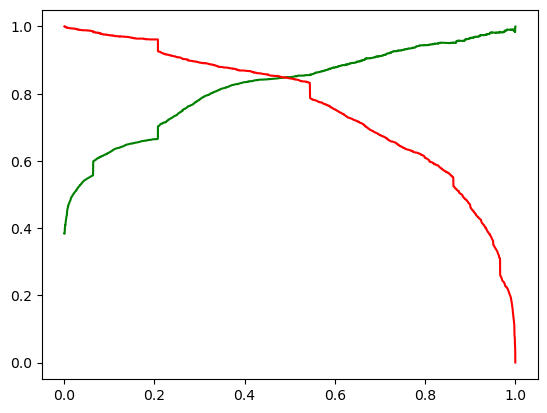

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.converted, y_train_pred_df.conversion_probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Now  we have all the columns which are significant and their vif values less than 5 with an accuracy of 83.75%

## Plotting ROC Curve for the final model with cut-off probability 0.8

In [153]:
def draw_roc(actual, probs):
    '''Function to calculate the roc curve for the actual and predicted values'''
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

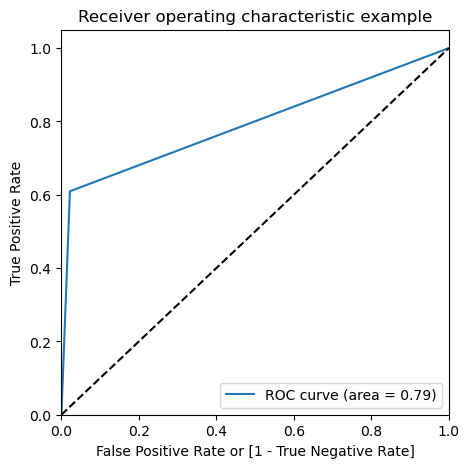

In [154]:
draw_roc(y_train_pred_df.converted, y_train_pred_df.predicted)

## Finding the optimal cutoff point

In [155]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.conversion_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Id,converted,conversion_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1871,0,0.003254,0,1,0,0,0,0,0,0,0,0,0
1,6795,0,0.388739,0,1,1,1,1,0,0,0,0,0,0
2,3516,0,0.003943,0,1,0,0,0,0,0,0,0,0,0
3,8105,0,0.122006,0,1,1,0,0,0,0,0,0,0,0
4,3934,0,0.207965,0,1,1,1,0,0,0,0,0,0,0


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.767007  0.974047  0.639430
0.2   0.2  0.800247  0.961476  0.700900
0.3   0.3  0.864100  0.892539  0.846577
0.4   0.4  0.884045  0.868613  0.893553
0.5   0.5  0.883890  0.845499  0.907546
0.6   0.6  0.866419  0.753852  0.935782
0.7   0.7  0.851886  0.676805  0.959770
0.8   0.8  0.837508  0.609489  0.978011
0.9   0.9  0.791280  0.469181  0.989755


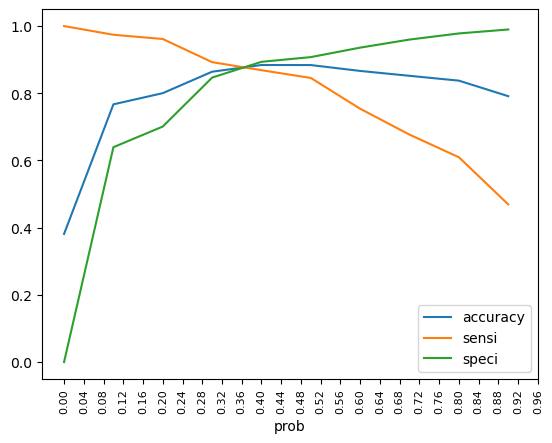

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.04),size=8, rotation = 90)
plt.show()

##### By Observing the above graph we can say that the optimal prob value is 0.36

In [158]:
y_train_pred_df['final_predicted'] = y_train_pred_df.conversion_probability.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_df.head()

,Id,converted,conversion_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1871,0,0.003254,0,1,0,0,0,0,0,0,0,0,0,0
1,6795,0,0.388739,0,1,1,1,1,0,0,0,0,0,0,1
2,3516,0,0.003943,0,1,0,0,0,0,0,0,0,0,0,0
3,8105,0,0.122006,0,1,1,0,0,0,0,0,0,0,0,0
4,3934,0,0.207965,0,1,1,1,0,0,0,0,0,0,0,0


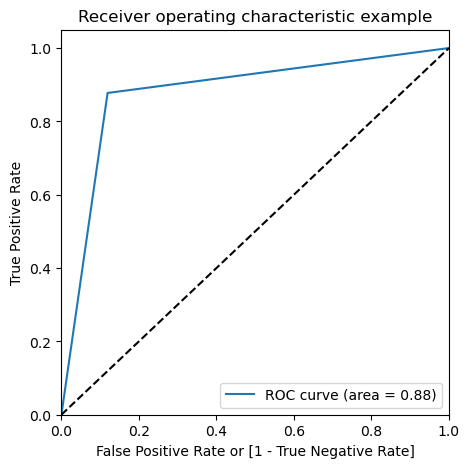

In [159]:
draw_roc(y_train_pred_df.converted, y_train_pred_df.final_predicted)

In [160]:
# Let's check the overall accuracy.
print("Accuracy of the model with cutoff probability of 0.36:",round(metrics.accuracy_score(y_train_pred_df.converted, y_train_pred_df.final_predicted)*100,2))
confusion = metrics.confusion_matrix(y_train_pred_df.converted, y_train_pred_df.final_predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity:",round(TP / float(TP+FN),2))
print("Specificity:",round(FP /float(FP+TN),2))
print("FalsePositive rate:",round(FP / float(TN+FP),2))
print ("Positive Predictive rate:",round(TP / float(TP+FP),2))
print ("Negative predictive:",round(TN / float(TN+ FN),2))

Accuracy of the model with cutoff probability of 0.36: 87.96
Sensitivity: 0.88
Specificity: 0.12
FalsePositive rate: 0.12
Positive Predictive rate: 0.82
Negative predictive: 0.92


In [161]:
print("Precision:",round(precision_score(y_train_pred_df.converted, y_train_pred_df.final_predicted),2))
print("Recall:",round(recall_score(y_train_pred_df.converted, y_train_pred_df.final_predicted),2))

Precision: 0.82
Recall: 0.88


# Making predictions on test dataset

In [162]:
X_test[numerical_columns].describe()

,TotalVisits,website_timespent,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,3.432540,496.617244,2.515902,14.101010,15.718254
std,2.510202,551.399285,1.521989,0.589735,1.181317
min,1.000000,0.000000,1.000000,13.000000,15.000000
25%,1.000000,13.000000,1.000000,14.000000,15.000000
50%,3.000000,258.000000,2.000000,14.000000,15.000000
75%,5.000000,949.000000,3.500000,14.000000,16.000000
max,10.000000,2253.000000,6.000000,15.000000,18.000000


In [163]:
# scaling the numerical columns
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [164]:
# cross checking
X_test[numerical_columns].describe()

,TotalVisits,website_timespent,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.009344,0.023314,0.022693,-0.011618,0.001010
std,1.000295,1.008922,1.011921,1.014907,1.006597
min,-0.960003,-0.885371,-0.985181,-1.906408,-0.611012
25%,-0.960003,-0.861584,-0.985181,-0.185452,-0.611012
50%,-0.163019,-0.413296,-0.320313,-0.185452,-0.611012
75%,0.633964,0.851060,0.676988,-0.185452,0.241085
max,2.626424,3.237051,2.339156,1.535503,1.945280


In [165]:
X_test = X_test[col]
X_test.head()

,Do Not Email,website_timespent,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS
4269,0,0.964504,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2376,0,-0.885371,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9199,0,-0.885371,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [166]:
X_test_sm = sm.add_constant(X_test)

In [167]:
#predictions
y_test_pred = model.predict(X_test_sm).values.reshape(-1)
y_test_pred[:10]

array([0.88245603, 0.96619265, 0.82565862, 0.00169489, 0.86247547,
       0.78433749, 0.62312859, 0.29934436, 0.09934944, 0.61540265])

In [168]:
#Creating a Data Frame with the predicted probabilites
y_test_df = pd.DataFrame({"Id":y_test.index,"converted":y_test.values,"conversion_probability":y_test_pred})
y_test_df.head()

,Id,converted,conversion_probability
0,4269,1,0.882456
1,2376,1,0.966193
2,7766,1,0.825659
3,9199,0,0.001695
4,4359,1,0.862475


In [169]:
#predicting the output
y_test_df['predicted'] = y_test_df.conversion_probability.apply(lambda x : 1 if x >=0.8 else 0)
y_test_df.head()

,Id,converted,conversion_probability,predicted
0,4269,1,0.882456,1
1,2376,1,0.966193,1
2,7766,1,0.825659,1
3,9199,0,0.001695,0
4,4359,1,0.862475,1


In [170]:
# Calculating the accuracy and confusion matrix of the model
print("Acuuracy of final model on test data set:", round(metrics.accuracy_score(y_test_df.converted, y_test_df.predicted)*100,2))

confusion = metrics.confusion_matrix(y_test_df.converted, y_test_df.predicted)
print("Confusion Matrix:",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity:",round(TP / float(TP+FN),2))
print("Specificity:",round(FP /float(FP+TN),2))
print("FalsePositive rate:",round(FP / float(TN+FP),2))
print ("Positive Predictive rate:",round(TP / float(TP+FP),2))
print ("Negative predictive:",round(TN / float(TN+ FN),2))

Acuuracy of final model on test data set: 82.97
Confusion Matrix: [[1641   36]
 [ 436  659]]
Sensitivity: 0.6
Specificity: 0.02
FalsePositive rate: 0.02
Positive Predictive rate: 0.95
Negative predictive: 0.79


In [171]:
print("Precision:",round(precision_score(y_test_df.converted, y_test_df.predicted),2))
print("Recall:",round(recall_score(y_test_df.converted, y_test_df.predicted),2))

Precision: 0.95
Recall: 0.6


### Our final model has accuracy of 83.75% on train data set with cut-off 0.8, with cut-off 0.36 accuracy is 87.96  and 82.97% on test data set.

## Determining feature importance

In [172]:
#To display features with corresponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
params_list = model.params[1:]
params_list

Do Not Email                               -1.15
website_timespent                           0.99
Lead Origin_Lead Add Form                   3.17
Last Activity_Converted to Lead            -1.49
Last Activity_Email Bounced                -1.09
Last Activity_Had a Phone Conversation      1.79
Last Activity_Olark Chat Conversation      -1.34
Last Activity_Page Visited on Website      -0.92
Last Activity_SMS Sent                      1.52
Country_Australia                          -3.01
occupation_Working Professional             2.79
Tags_Busy                                   3.20
Tags_Closed by Horizzon                     8.71
Tags_Graduation in progress                 1.85
Tags_Lost to EINS                           8.32
Tags_Ringing                               -0.69
Tags_Will revert after reading the email    3.70
Tags_in touch with EINS                     3.20
dtype: float64

In [173]:
#Relative feature importance
feature_imp = params_list
feature_imp = 100.0*(feature_imp/feature_imp.max())
feature_imp

Do Not Email                               -13.25
website_timespent                           11.40
Lead Origin_Lead Add Form                   36.44
Last Activity_Converted to Lead            -17.13
Last Activity_Email Bounced                -12.56
Last Activity_Had a Phone Conversation      20.57
Last Activity_Olark Chat Conversation      -15.39
Last Activity_Page Visited on Website      -10.53
Last Activity_SMS Sent                      17.42
Country_Australia                          -34.60
occupation_Working Professional             31.98
Tags_Busy                                   36.73
Tags_Closed by Horizzon                    100.00
Tags_Graduation in progress                 21.24
Tags_Lost to EINS                           95.56
Tags_Ringing                                -7.88
Tags_Will revert after reading the email    42.50
Tags_in touch with EINS                     36.72
dtype: float64

In [174]:
#To sort features based on importance
sorted_list = np.argsort(feature_imp,kind='quicksort',order='list of str')
sorted_list

Do Not Email                                 9
website_timespent                            3
Lead Origin_Lead Add Form                    6
Last Activity_Converted to Lead              0
Last Activity_Email Bounced                  4
Last Activity_Had a Phone Conversation       7
Last Activity_Olark Chat Conversation       15
Last Activity_Page Visited on Website        1
Last Activity_SMS Sent                       8
Country_Australia                            5
occupation_Working Professional             13
Tags_Busy                                   10
Tags_Closed by Horizzon                      2
Tags_Graduation in progress                 17
Tags_Lost to EINS                           11
Tags_Ringing                                16
Tags_Will revert after reading the email    14
Tags_in touch with EINS                     12
dtype: int64

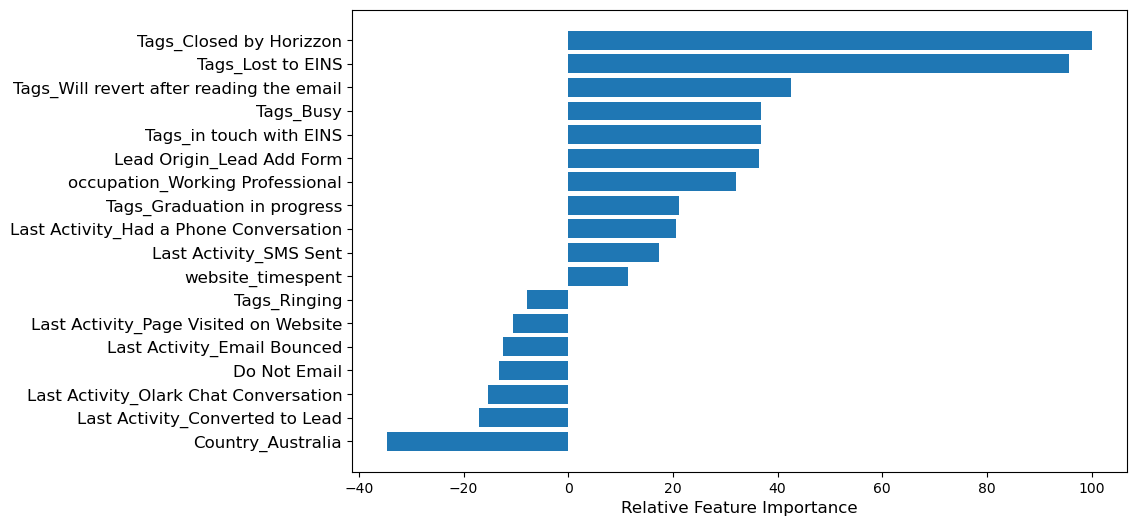

In [175]:
#Plotting features with relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
pos = np.arange(sorted_list.shape[0])
ax.barh(pos,feature_imp[sorted_list])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[sorted_list],fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12)
plt.show()

# Conclusion:

1. Company should focus on Working professionals as they are more likely to get converted.
2. Leads whose current status is Ringing are more likely to not get converted, so company should focus on leads whose status is Lost to EINS,Closed by Horizzon,Graduation in progress, Will revert after reading the email.
3. Leads who spend more time on website are more likely to get converted
4. Leads who are willing to receive emails have higher chances of conversion
5. Leads whose last activity is "Converted to Lead", "Olark Chat Conversation", "Email Bounced" are not likely to get converted, so focus on leads whose last activity is "Had a Phone Conversation" and "SMS Sent"
6. Leads whose location is out of India are not likely to convert